In [1]:
!pip install numpy 
!pip install pandas 
!pip install matplotlib 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
# for taking the two columns at the same time  for making the plots
from itertools import combinations 
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
# perfroming the methmatical functions 
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import log_loss, balanced_accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import warnings

In [2]:
warnings.filterwarnings("ignore")


In [3]:
# data import x train,ytrain,xtest,ytest
X_train=pd.read_csv('x_train.csv')
Y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('x_test.csv')
Y_test=pd.read_csv('y_test.csv')

In [4]:
# drop the column "ID" no need of it 
Y_train=Y_train.drop(columns=['ID'])

# clubbing the both datasets

In [6]:
# Clubbing The Datasets
X_train['target']=Y_train

# Full Dataset In the One 

In [8]:
# declaring the data as the global to make "data" work in the any code snippet
global data 
# transfering the club data into the other dataset for integrity 
data=X_train

In [9]:
# checking the data transfer 
data.head(10)


ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4  f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   
5  500bf0fce5509f8faa0d59a3be66a7cb      0.0      886   2842.0 -1.126335   
6  5f8333ef730a6ce87968d0158a684e05      0.0     2495   2612.0 -2.028572   
7  35de3c8468023ca3cecdcc99f60c2c3d      0.0     2495   3053.0  0.678139   
8  9625a2859019d065054db34a70cacc0b      2.0      657    137.0 -0.404545   
9  3eb10613bbe82e509ccb2fd5e74b9669      0.0      647   1678.0 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column13  Column14  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0  0.001351   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0  0.001351   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1  0.001351   
3       NaN       NaN -0.407939 -0.015607 -0.774979  ...         0       NaN   
4 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0       NaN   
5 -1.216445 -0.007469 -0.407939 -0.015607 -0.774979  ...         1       NaN   
6 -1.855728 -0.007468 -0.402851 -0.015607  0.673163  ...         1  0.001351   
7  0.701403 -0.007468 -0.094001 -0.015605  0.136592  ...         0  0.001351   
8 -0.321449 -0.007467 -0.407939 -0.015607  0.634026  ...         1  0.001351   
9 -1.571603 -0.007469 -0.407939 -0.015607 -0.774979  ...         0       NaN   

   Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0   0.00339       0.0         0       0.0         0         0         0   
1   0.00339       0.0         0       0.0         0         0         0   
2   0.00339       0.0         0       0.0         0         0         0   
3   0.00339       0.0         0       1.0         0         0         0   
4   0.00339       0.0         0       0.0         0         0         0   
5   0.00339       0.0         0       0.0         0         0         0   
6   0.00339       0.0         0       0.0         0         0         0   
7   0.00339       0.0         0       0.0         0         0         0   
8   0.00339       0.0         0       0.0         0         0         0   
9   0.00339       0.0         0       0.0         0         0         0   

   target  
0       0  
1       0  
2       0  
3       1  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0  

[10 rows x 24 columns]

In [10]:
# checking the Null Values 
print(data.isnull().sum())
# checking the shape of the data 
print(data.shape)

ID               0
Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column9     732137
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
target           0
dtype: int64
(785133, 24)


In [11]:
print(data.dtypes)

ID           object
Column0     float64
Column1       int64
Column2     float64
Column3     float64
Column4     float64
Column5     float64
Column6     float64
Column7     float64
Column8     float64
Column9     float64
Column10      int64
Column11      int64
Column12      int64
Column13      int64
Column14    float64
Column15    float64
Column16    float64
Column17      int64
Column18    float64
Column19      int64
Column20      int64
Column21      int64
target        int64
dtype: object


# Duplicates Check

In [13]:
# checking the duplicates elements
data.duplicated().sum()

0

In [14]:
# checking the unique values
data.nunique()

ID          785133
Column0         19
Column1       2564
Column2       9424
Column3         47
Column4         47
Column5     148334
Column6     157264
Column7     166513
Column8     355728
Column9      49650
Column10         2
Column11         2
Column12         2
Column13         2
Column14     42362
Column15     66302
Column16         3
Column17       153
Column18        11
Column19         2
Column20         2
Column21         2
target           2
dtype: int64

In [15]:
# dropping the unecessary columns not required for the some columns have full nan and same have full same values+nan
data=data.drop(columns=['ID'])
data=data.drop(columns=['Column5'])
data=data.drop(columns=['Column9'])
data=data.drop(columns=['Column14'])
data=data.drop(columns=['Column15'])

# Check Whether Dropped or Not

In [17]:
data

Column0  Column1  Column2   Column3   Column4   Column6   Column7  \
0           2.0     2495   3726.0  0.678139  0.701403  0.434190 -0.015603   
1           0.0     2495   3454.0  0.452580  0.701403  1.554998 -0.015574   
2           2.0     2495   4543.0 -1.577453 -1.429540 -0.407939 -0.015607   
3           0.0      211     59.0       NaN       NaN -0.407939 -0.015607   
4           0.0      718    950.0 -2.028572 -1.855728 -0.407939 -0.015607   
...         ...      ...      ...       ...       ...       ...       ...   
785128      0.0      304   1126.0  0.678139  0.701403 -0.407939 -0.015607   
785129      0.0     2495   2265.0  0.678139  0.701403 -0.407939 -0.015607   
785130      0.0     2495   3760.0  0.678139  0.701403 -0.407939 -0.015607   
785131      0.0     2480   4493.0  0.001462  0.062121 -0.407939 -0.015607   
785132      0.0     2495   4202.0  0.678139  0.701403  3.440511 -0.015603   

         Column8  Column10  Column11  Column12  Column13  Column16  Column17  \
0       0.606265         0         0         0         0       0.0         0   
1       0.329946         0         0         0         0       0.0         0   
2      -0.774979         1         1         1         1       0.0         0   
3      -0.774979         0         0         0         0       0.0         0   
4      -0.774979         0         0         0         0       0.0         0   
...          ...       ...       ...       ...       ...       ...       ...   
785128 -0.774979         0         0         0         0       0.0         0   
785129  0.509591         1         1         1         1       0.0         0   
785130  0.218972         0         0         1         1       0.0         0   
785131  0.400071         1         1         1         1       0.0         0   
785132  0.471097         0         0         0         0       0.0         0   

        Column18  Column19  Column20  Column21  target  
0            0.0         0         0         0       0  
1            0.0         0         0         0       0  
2            0.0         0         0         0       0  
3            1.0         0         0         0       1  
4            0.0         0         0         0       0  
...          ...       ...       ...       ...     ...  
785128       1.0         0         0         0       0  
785129       0.0         0         0         0       0  
785130       0.0         0         0         0       0  
785131       0.0         0         0         0       0  
785132       0.0         0         0         0       0  

[785133 rows x 19 columns]

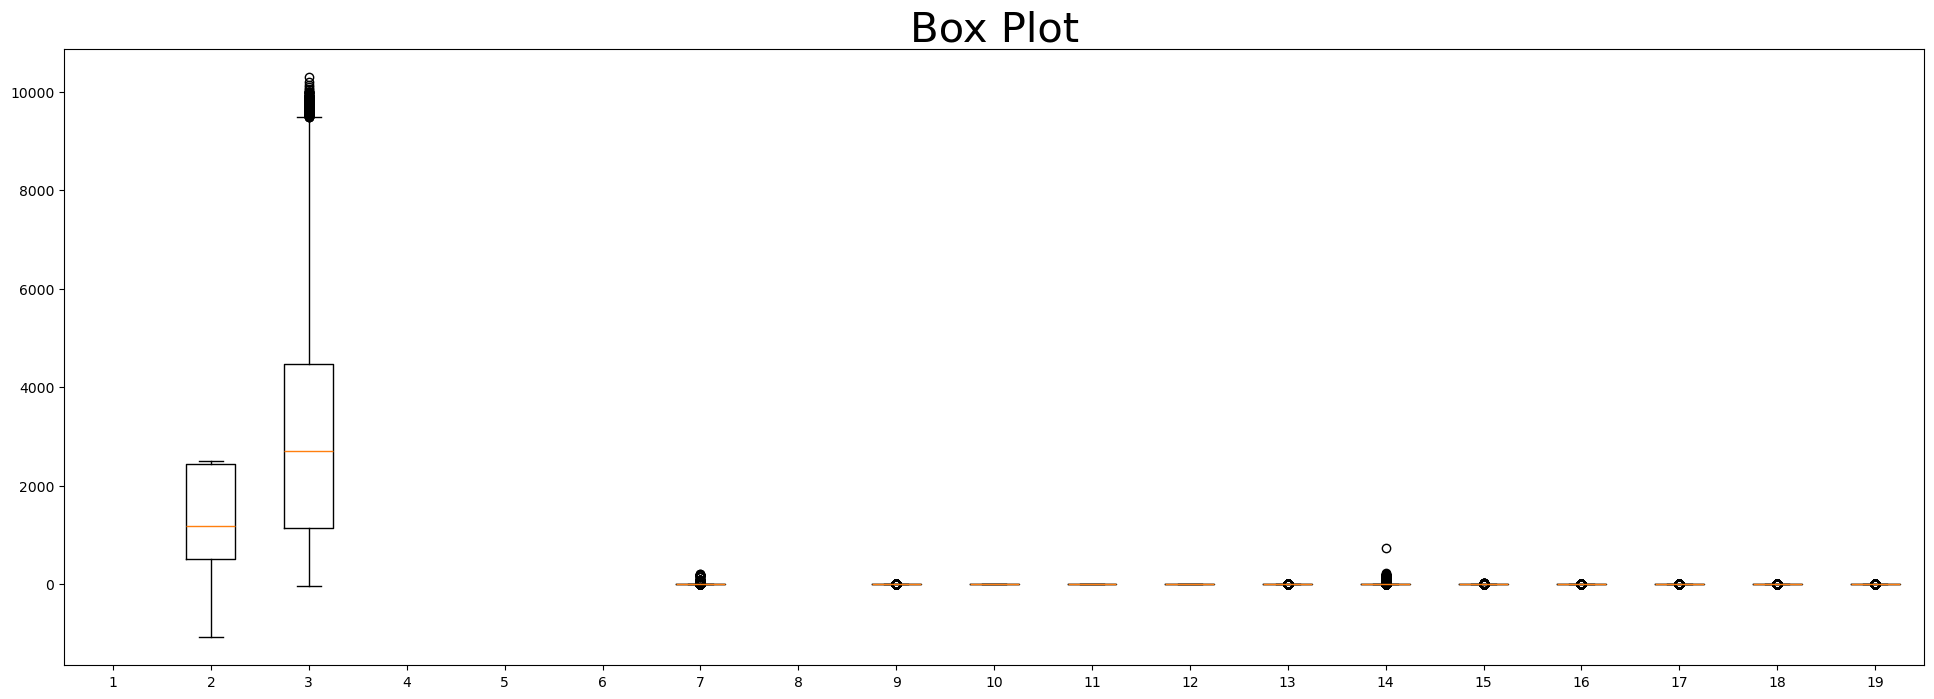

In [18]:
# for checking the outliers 
plt.subplots(figsize=(24,8))
plt.boxplot(data)
plt.title('Box Plot',fontsize=30)
plt.show()

# Columns Which has Co-Realtion

In [ ]:
# scatter plot for cheking the relationship of the columns 
columns=data.columns
for col1,col2 in combinations(columns,2):
    plt.subplots(figsize=(20,8))
    plt.scatter(data[col1],data[col2])
    plt.title('scatterr plot')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [33]:
# 0 and 1
# 0 and 2
# 0 and 3
# 0 and 4
# 1 and 2
# 1 and 3
# 1 and 4
# 1 and 5
# 1 and 17
# 2 and 3
# 2 and 4
# 3 and 4

# MICE(Multiple Imputation of Chained Equations)

In [35]:
def Mice_Imputation(data,k):
    # Intialize the RandomForest Model with the n_jobs=-1 for the parallel processing
    model=RandomForestRegressor(n_jobs=-1)
    n=0
    while n < k:
        # making the copy of the dataset for avoiding modifyinng the orginal data directly 
        data_copy=data.copy()  
        # temporarly filling  all Columns by the median to prepare for training 
        data_copy['Column0'] = data_copy['Column0'].fillna(data_copy['Column0'].median())
        data_copy['Column3'] = data_copy['Column3'].fillna(data_copy['Column3'].median())
        data_copy['Column4'] = data_copy['Column4'].fillna(data_copy['Column4'].median())
        # checking if the column0 exist and contain null values to impute 
        if 'Column0' in data.columns and data['Column0'].isnull().sum() >0:
            # train the model using available data from column3 and column4
            train_data=data_copy.loc[data_copy['Column0'].notnull() & data_copy['Column3'].notnull() & data_copy['Column4'].notnull(),['Column3','Column4']]
            target_data=data_copy.loc[data_copy['Column0'].notnull(),'Column0']
            
            # check if there is the sufficent data for training
            if len(train_data) >0:
                model.fit(train_data,target_data)
                # Prepare test data where Column0 is null and the other columns are not null
                test_data=data_copy.loc[data_copy['Column0'].isnull() & data_copy['Column3'].notnull() & data_copy['Column4'].notnull(),['Column3','Column4']]
                # checking if their is the sufficent data for testing 
                if len(test_data) > 0: 
                    # predict the missing values in column 0 and update the data copy
                    y_pred_0=model.predict(test_data)
                    data_copy.loc[data_copy['Column0'].isnull() & data_copy['Column3'].notnull() & data_copy['Column4'].notnull(),'Column0']=y_pred_0
                    
        # checking if the column3 exist and contain null values to impute              
        if 'Column3' in data.columns and data['Column3'].isnull().sum() >0:
            # train the model using the available data for the column0 and column4
            train_data=data_copy.loc[data_copy['Column3'].notnull() & data_copy['Column0'].notnull() & data_copy['Column4'].notnull(),['Column0','Column4']]
            target_data=data_copy.loc[data_copy['Column3'].notnull(),'Column3']
            # check if there is the sufficent data for training
            if len(train_data) > 0:
                model.fit(train_data,target_data)
                # Prepare test data where Column3 is null and the other columns are not null
                test_data=data_copy.loc[data_copy['Column3'].isnull() & data_copy['Column0'].notnull() & data_copy['Column4'].notnull(),['Column0','Column4']]
                 # checking if their is the sufficent data for testing 
                if len(test_data) > 0:
                    # predict the missing values in column 3 and update the data copy
                    y_pred_3=model.predict(test_data)
                    data_copy.loc[data_copy['Column3'].isnull() & data_copy['Column0'].notnull() & data_copy['Column4'].notnull(),'Column3']=y_pred_3
                    
        # checking if the column3 exist and contain null values to impute
        if 'Column4' in data.columns and data['Column4'].isnull().sum() >0:
            train_data=data_copy.loc[data_copy['Column4'].notnull() & data_copy['Column0'].notnull() & data_copy['Column3'].notnull(),['Column0','Column3']]
            target_data=data_copy.loc[data_copy['Column4'].notnull(),'Column4']
            # check if there is the sufficent data for training
            if len(train_data) > 0:
                model.fit(train_data,target_data)
                # Prepare test data where Column4 is null and the other columns are not null
                test_data = data_copy.loc[data_copy['Column4'].isnull() & data_copy['Column0'].notnull() & data_copy['Column3'].notnull(), ['Column0', 'Column3']]
                if len(test_data) > 0:
                    # predict the missing values in column 4 and update the data copy
                    y_pred_4=model.predict(test_data)
                    data_copy.loc[data_copy['Column4'].isnull() & data_copy['Column0'].notnull() & data_copy['Column3'].notnull(),'Column3']=y_pred_4
        # Update the orginal data with the imputed values from data_copy
        data.update(data_copy)
        # increment the iteration counter
        n += 1
    # return the imputed data
    return data

# call the MICE Imputation function with the 2 iterations
result_data = Mice_Imputation(data, k=2)

In [37]:
def Mice_Imputation(data,k):
    # Intialize the RandomForest Model with the n_jobs=-1 for the parallel processing
    model = RandomForestRegressor(n_jobs=-1)  
    n = 0  

    while n<k:
        # making the copy of the dataset for avoiding modifiying the orginal data directly
        data_copy=data.copy()  
        # temporarly filling  all Columns by the median to prepare for training
        data_copy['Column6']=data_copy['Column6'].fillna(data_copy['Column6'].median())
        data_copy['Column8']=data_copy['Column8'].fillna(data_copy['Column8'].median())
        # checking if the column6 exist and contain null values to impute
        if 'Column6' in data.columns and data['Column6'].isnull().sum() >0:
            # train the model using available data from column8
            train_data=data_copy.loc[data_copy['Column6'].notnull() & data_copy['Column8'].notnull(),['Column8']]
            target_data=data_copy.loc[data_copy['Column6'].notnull(),'Column6']
            # check if there is the sufficent data for training
            if len(train_data)>0:
                model.fit(train_data,target_data)
                # Prepare test data where Column6 is null and the other columns are not null
                test_data = data_copy.loc[data_copy['Column6'].isnull() & data_copy['Column8'].notnull(), ['Column8']]
                # checking if their is the sufficent data for testing
                if len(test_data) > 0:
                    # predict the missing values in column 6 and update the data copy
                    y_pred_6 = model.predict(test_data)
                    data_copy.loc[data_copy['Column6'].isnull() & data_copy['Column8'].notnull(),'Column6']=y_pred_6
# imputing the column8
        # checking if the column8 exist and contain null values to impute
        if 'Column8' in data.columns and data['Column8'].isnull().sum() >0:
            # train the model using available data from column6
            train_data=data_copy.loc[data_copy['Column8'].notnull() & data_copy['Column6'].notnull(),['Column6']]
            target_data=data_copy.loc[data_copy['Column8'].notnull() ,'Column8']
            # check if there is the sufficent data for training
            if len(train_data) > 0:
                model.fit(train_data,target_data)
                # Prepare test data where Column8 is null and the other columns are not null
                test_data=data_copy.loc[data_copy['Column8'].isnull() & data_copy['Column6'].notnull(),['Column6']]
                # checking if their is the sufficent data for testing
                if len(test_data)>0:
                    # predict the missing values in column 8 and update the data copy
                    y_pred_8=model.predict(test_data)
                    data_copy.loc[data_copy['Column8'].isnull() & data_copy['Column6'].notnull(),'Column8']=y_pred_8
        # Update the orginal data with the imputed values from data_copy
        data.update(data_copy)
        # increment the iteration counter
        n += 1
    # return the imputed data
    return data
# call the MICE Imputation function with the 2 iterations
result_data = Mice_Imputation(data, k=2)

In [39]:
# checking the null values after applying the mice
data.isnull().sum()

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column6     0
Column7     0
Column8     0
Column10    0
Column11    0
Column12    0
Column13    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
target      0
dtype: int64

In [39]:
# plotting the histogram for checking the skewness
def plot_histogram(data,bins=30,kde=True):
    for col in data.columns:
        plt.subplots(figsize=(20,8))
        plt.hist(data[col],bins=bins,kde=kde)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [41]:
# not applied  strong  method as outliers is benifical in this case 
def zscore(data,threshold=3):
    # taken help for understanding this method not to take the columns with the zero std
    non_constant_columns=data.loc[:,data.apply(lambda col:col.std()!=0)]
    if non_constant_columns.empty:
        print('Non constant columns found to apply zscore')
        return data
    # finding mean of the non constant columns
    mean=np.mean(non_constant_columns)
    # finding the std of the non constant columns
    std_dev=np.std(non_constant_columns)
    z_scores=(non_constant_columns-mean)/std_dev
    # filtering the outliers
    filter_outlier=non_constant_columns[(np.abs(z_scores)<=threshold).any(axis=1)]
    return filter_outlier
# calling the data for filtering the outliers
cleaned_data=zscore(data,threshold=3)
print(cleaned_data)

        Column0  Column1  Column2   Column3   Column4   Column6   Column7  \
0           2.0     2495   3726.0  0.678139  0.701403  0.434190 -0.015603   
1           0.0     2495   3454.0  0.452580  0.701403  1.554998 -0.015574   
2           2.0     2495   4543.0 -1.577453 -1.429540 -0.407939 -0.015607   
3           0.0      211     59.0  0.678139  0.701403 -0.407939 -0.015607   
4           0.0      718    950.0 -2.028572 -1.855728 -0.407939 -0.015607   
...         ...      ...      ...       ...       ...       ...       ...   
785128      0.0      304   1126.0  0.678139  0.701403 -0.407939 -0.015607   
785129      0.0     2495   2265.0  0.678139  0.701403 -0.407939 -0.015607   
785130      0.0     2495   3760.0  0.678139  0.701403 -0.407939 -0.015607   
785131      0.0     2480   4493.0  0.001462  0.062121 -0.407939 -0.015607   
785132      0.0     2495   4202.0  0.678139  0.701403  3.440511 -0.015603   

         Column8  Column10  Column11  Column12  Column13  Column16  Column1

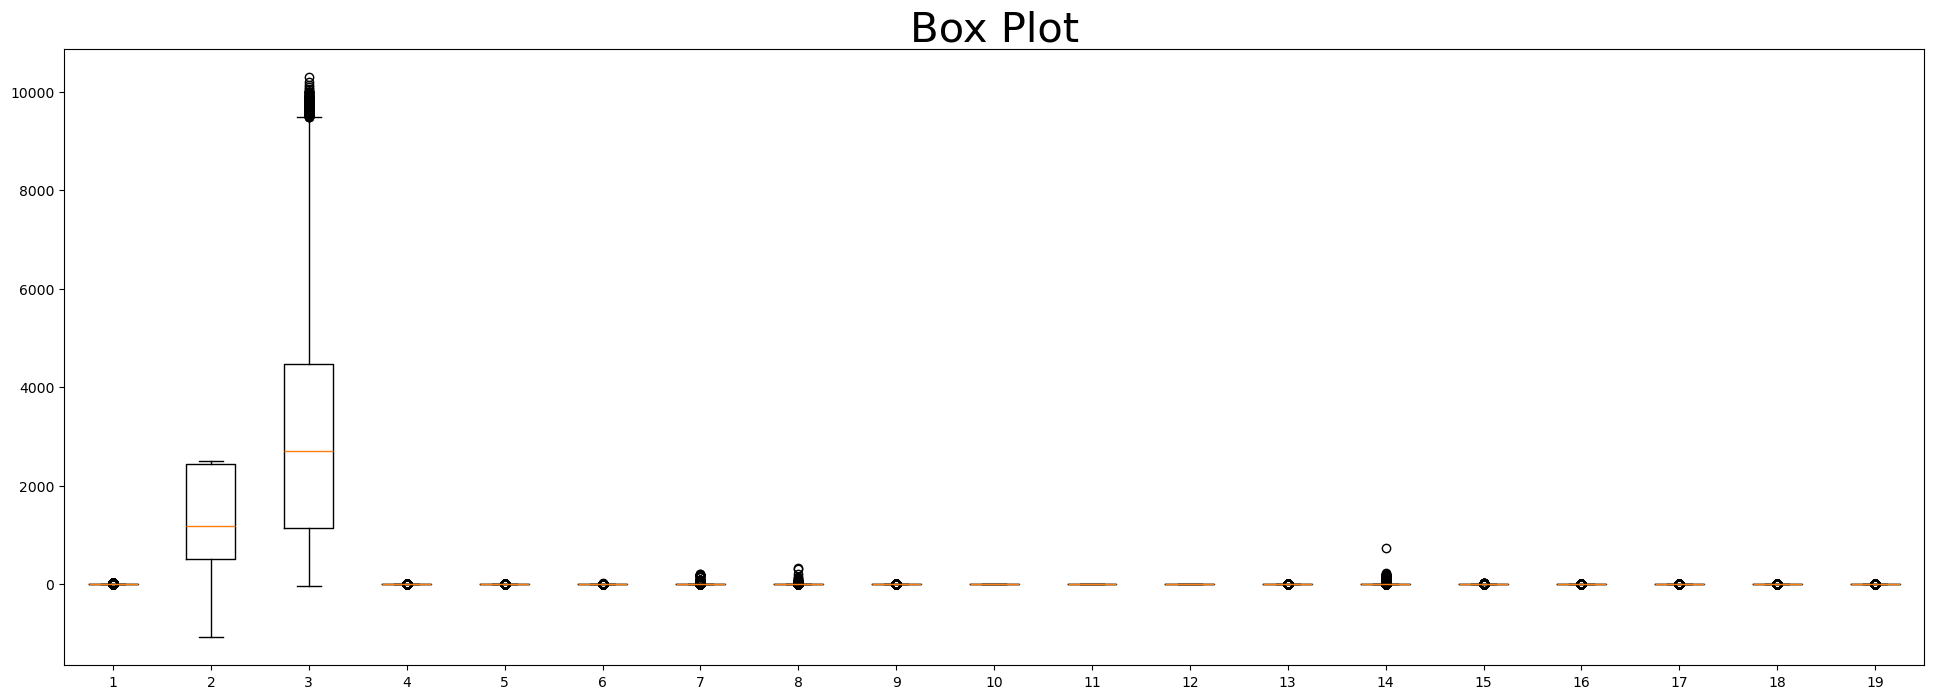

In [43]:
# boxplot for checking the outliers is removed or not 
plt.subplots(figsize=(24,8))
plt.boxplot(data)
plt.title('Box Plot',fontsize=30)
plt.show()

In [45]:
# finding the skewness of the data
def skewness_find(data):
    n=len(data)
    n_1=n-1
    n_2=n-2
    mean=np.mean(data)
    variance_n=np.sum((data-mean)**2)/n
    std_dev=np.sqrt(variance_n)
    skewness=(n/(n_1*n_2))*np.sum(((data-mean)/std_dev)**3)
    return skewness
skewness_value=skewness_find(data)
print(f"Skewness: {skewness_value}")


Skewness: Column0    -1.000043
Column1     1.416995
Column2     1.489992
Column3    -1.000031
Column4    -1.000031
Column6    -1.000033
Column7    -1.000024
Column8    -1.000028
Column10   -1.000009
Column11   -1.000010
Column12   -1.000011
Column13   -1.000010
Column16   -1.000004
Column17   -1.000197
Column18   -1.000009
Column19   -1.000004
Column20   -1.000004
Column21   -1.000004
target     -1.000006
dtype: float64


In [47]:
# length of data after the preprocessing
a=len(data)
print(len(data))


785133


# Dropping after Seeing the Imbalance in the Dataset

In [49]:
# dropping the highly imbalanced columns 
data=data.drop(columns=['Column16'])
data=data.drop(columns=['Column20'])
data=data.drop(columns=['Column21'])

# Feature Selection with the Imbalanced Dataset

In [51]:
data

Column0  Column1  Column2   Column3   Column4   Column6   Column7  \
0           2.0     2495   3726.0  0.678139  0.701403  0.434190 -0.015603   
1           0.0     2495   3454.0  0.452580  0.701403  1.554998 -0.015574   
2           2.0     2495   4543.0 -1.577453 -1.429540 -0.407939 -0.015607   
3           0.0      211     59.0  0.678139  0.701403 -0.407939 -0.015607   
4           0.0      718    950.0 -2.028572 -1.855728 -0.407939 -0.015607   
...         ...      ...      ...       ...       ...       ...       ...   
785128      0.0      304   1126.0  0.678139  0.701403 -0.407939 -0.015607   
785129      0.0     2495   2265.0  0.678139  0.701403 -0.407939 -0.015607   
785130      0.0     2495   3760.0  0.678139  0.701403 -0.407939 -0.015607   
785131      0.0     2480   4493.0  0.001462  0.062121 -0.407939 -0.015607   
785132      0.0     2495   4202.0  0.678139  0.701403  3.440511 -0.015603   

         Column8  Column10  Column11  Column12  Column13  Column17  Column18  \
0       0.606265         0         0         0         0         0       0.0   
1       0.329946         0         0         0         0         0       0.0   
2      -0.774979         1         1         1         1         0       0.0   
3      -0.774979         0         0         0         0         0       1.0   
4      -0.774979         0         0         0         0         0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
785128 -0.774979         0         0         0         0         0       1.0   
785129  0.509591         1         1         1         1         0       0.0   
785130  0.218972         0         0         1         1         0       0.0   
785131  0.400071         1         1         1         1         0       0.0   
785132  0.471097         0         0         0         0         0       0.0   

        Column19  target  
0              0       0  
1              0       0  
2              0       0  
3              0       1  
4              0       0  
...          ...     ...  
785128         0       0  
785129         0       0  
785130         0       0  
785131         0       0  
785132         0       0  

[785133 rows x 16 columns]

In [53]:
# Function for changing the labels 
def ChangeLabel(temp_data,cluster_labels,label):
    # Assign the Cluster Labels to the rows with the specified target labels
    temp_data.loc[temp_data['target']==label,'ClusterLabel']=cluster_labels
# Function to dynamically calculate the K Value for each class based on the size of the class 
def dynamic_k_calculation(data,min_clusters=2,max_clusters=10):
    # get the unique target classes and their counts
    unique_classes=data['target'].unique()
    class_counts=data['target'].value_counts()
    
    K={} # Dictonary to store k values for each class   
    for label in unique_classes:
        # Calculate the class size and determine  the k value for clustering 
        class_size=class_counts[label]
        k_value = max(min_clusters,min(int(math.sqrt(class_size)), max_clusters))
        K[label]=k_value
        
    return K # return the dictionary with the k values for each target class  
    
# Function for performing the local clustering
def Clustering_Local(data,K):
    # Make the copy and intialize the clusterlabel with the -1
    temp_data=data.copy()
    temp_data['ClusterLabel']=-1
    unique_classes=temp_data['target'].unique()
    
    for label in unique_classes:
        print(f"Processing class :{label}")
        # Filter data for the current class and drop 'target' and 'ClusterLabel' columns from features
        class_data=temp_data[temp_data['target']==label]
        features=class_data.drop(columns=['target','ClusterLabel'],errors='ignore')
        # get the k value for the current class
        k_value=K[label]
        # perform clustering if the class size is greater than or equal to k
        if len(class_data) >=k_value:
            kmeans = KMeans(n_clusters=k_value, random_state=42)
            cluster_labels = kmeans.fit_predict(features)
            ChangeLabel(temp_data, cluster_labels, label)
        else:
            # if the class size is too small,assign all points to the same cluster
            temp_data.loc[temp_data['target'] == label, 'ClusterLabel'] = 0
    
    return temp_data #return the data with the cluster labels 
# Function to handle any missing cluster labels (NAN values) 
def handle_missing_cluster_labels(temp_data):
    nan_count = temp_data['ClusterLabel'].isna().sum()
    if nan_count >0:
        print('NaN values found, handling them')
        # replace the nan values by the frequent mode of the each class
        temp_data['ClusterLabel'] = temp_data.groupby('target')['ClusterLabel'].apply(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty() else -1))
    else:
        print("No NaN values found in ClusterLabel.")

# Function to compute the joint probability for mutual info calculation
def joint_prob_mutual_info(feature, labels):
    # create the cross tabulation to compute joint probabilites
    joint_prob_df=pd.crosstab(feature,labels,normalize=True)
    return joint_prob_df
# Function to perform marginal probabilities for mutual information calculation
def marginal_prob_mutual_info(feature,labels):
    joint_prob_df = pd.crosstab(feature, labels,normalize=True)
    # Compute the Marginal Probabilities for features and the labels
    marginal_prob_feature = joint_prob_df.sum(axis=1)  
    marginal_prob_labels = joint_prob_df.sum(axis=0)   
    
    return marginal_prob_feature, marginal_prob_labels
# Function to compute the mutual Information for each feature based on joint and marginal probabilities
def mutual_info_classify_fused(data, labels):
    feature_scores = {}
    for col in data.columns:
        feature = data[col]
        # Compute joint and marginal probabilities for the current feature
        Joint_Prob = joint_prob_mutual_info(feature, labels)
        Marginal_Prob_Feature, Marginal_Prob_Labels = marginal_prob_mutual_info(feature, labels)
        
        mutual_info = 0
        Joint_Prob_values = Joint_Prob.values.flatten()
        Marginal_Prob_Feature_values = np.repeat(Marginal_Prob_Feature.values, Joint_Prob.shape[1])
        Marginal_Prob_Labels_values = np.tile(Marginal_Prob_Labels.values, Joint_Prob.shape[0])
        # Compute the mutual information using the formula based on the marginal and the joint probabilities
        non_zero_joint = Joint_Prob_values > 0
        mutual_info += np.sum(
            Joint_Prob_values[non_zero_joint] * np.log(
                Joint_Prob_values[non_zero_joint] / 
                (Marginal_Prob_Feature_values[non_zero_joint] * Marginal_Prob_Labels_values[non_zero_joint])
            )
        )
        # Store the mutual information score for the current feature 
        feature_scores[col] = mutual_info
        print(f"Mutual Information for {col}: {mutual_info}")
    
    return feature_scores #return the dictonary of the mutual information scores for the features

def ranking_descending_order(feature_scores, M):
    # Sort the features by mutual information score in descending order
    ranked_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
    # Select the top M features
    top_features = [feature for feature,score in ranked_features[:M]]
    print(f"Top {M} features: {top_features}")
    return top_features

# Step 1: Calculate dynamic k values for each class
K = dynamic_k_calculation(data)

# Step 2: Perform local clustering based on dynamic k values
temp_clustered_data = Clustering_Local(data, K)

# Step 3: Handle missing cluster labels in the clustered data
handle_missing_cluster_labels(temp_clustered_data)

# Step 4: Calculate mutual information for features based on cluster labels
labels = temp_clustered_data['ClusterLabel']
feature_scores = mutual_info_classify_fused(temp_clustered_data.drop(columns=['target', 'ClusterLabel']), labels)
# Step 5: Rank the features based on mutual information and select the top M features
M = 13  
top_features = ranking_descending_order(feature_scores, M)

# Step 6: Create a newdataset with the top features and target column, then save to a CSV file
data_updated = temp_clustered_data[top_features + ['target']]  
data_updated.to_csv('clustered_top_features.csv', index=False)

# Step 7: Notify that the data has been saved
print("Data saved to 'clustered_top_features.csv'")


Processing class :0
Processing class :1
No NaN values found in ClusterLabel.
Mutual Information for Column0: 0.08100062205061369
Mutual Information for Column1: 0.6216231139578141
Mutual Information for Column2: 1.4301615866393849
Mutual Information for Column3: 0.05367396581818826
Mutual Information for Column4: 0.07271054362477121
Mutual Information for Column6: 0.5097167368980846
Mutual Information for Column7: 0.5803829060413356
Mutual Information for Column8: 1.1466422095942936
Mutual Information for Column10: 0.005633663284084383
Mutual Information for Column11: 0.007304415005697035
Mutual Information for Column12: 0.01394252474844438
Mutual Information for Column13: 0.00768862808648297
Mutual Information for Column17: 0.013654389714589333
Mutual Information for Column18: 0.02674011754093483
Mutual Information for Column19: 0.006529701706996112
Top 13 features: ['Column2', 'Column8', 'Column1', 'Column7', 'Column6', 'Column0', 'Column4', 'Column3', 'Column18', 'Column12', 'Column

In [54]:
# Check for missing values as cluster label was having before 
missing_values = data.isnull().sum()
print(missing_values)

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column6     0
Column7     0
Column8     0
Column10    0
Column11    0
Column12    0
Column13    0
Column17    0
Column18    0
Column19    0
target      0
dtype: int64


In [55]:
# converting the updated data to the df named dataframe 
df = pd.DataFrame(data_updated)


In [56]:
# arranging the columns in the ascending order 
ascending_order=['Column0','Column1','Column2','Column3','Column4','Column6','Column7','Column8','Column11','Column12','Column13','Column17','Column18','target']
clustered_data=df[ascending_order]
print(clustered_data)

        Column0  Column1  Column2   Column3   Column4   Column6   Column7  \
0           2.0     2495   3726.0  0.678139  0.701403  0.434190 -0.015603   
1           0.0     2495   3454.0  0.452580  0.701403  1.554998 -0.015574   
2           2.0     2495   4543.0 -1.577453 -1.429540 -0.407939 -0.015607   
3           0.0      211     59.0  0.678139  0.701403 -0.407939 -0.015607   
4           0.0      718    950.0 -2.028572 -1.855728 -0.407939 -0.015607   
...         ...      ...      ...       ...       ...       ...       ...   
785128      0.0      304   1126.0  0.678139  0.701403 -0.407939 -0.015607   
785129      0.0     2495   2265.0  0.678139  0.701403 -0.407939 -0.015607   
785130      0.0     2495   3760.0  0.678139  0.701403 -0.407939 -0.015607   
785131      0.0     2480   4493.0  0.001462  0.062121 -0.407939 -0.015607   
785132      0.0     2495   4202.0  0.678139  0.701403  3.440511 -0.015603   

         Column8  Column11  Column12  Column13  Column17  Column18  target 

In [57]:
# Save the modified DataFrame back to the original CSV file
clustered_data.to_csv('clustered_top_features.csv', index=False)

In [58]:
# dividing the data into the x and y "y" having the target and x having the all columns except target
x=clustered_data.drop(columns=['target'],axis=1)
y=clustered_data['target']

In [59]:
x.shape

(785133, 13)

In [60]:
y.shape

(785133,)

In [61]:
clustered_data

Column0  Column1  Column2   Column3   Column4   Column6   Column7  \
0           2.0     2495   3726.0  0.678139  0.701403  0.434190 -0.015603   
1           0.0     2495   3454.0  0.452580  0.701403  1.554998 -0.015574   
2           2.0     2495   4543.0 -1.577453 -1.429540 -0.407939 -0.015607   
3           0.0      211     59.0  0.678139  0.701403 -0.407939 -0.015607   
4           0.0      718    950.0 -2.028572 -1.855728 -0.407939 -0.015607   
...         ...      ...      ...       ...       ...       ...       ...   
785128      0.0      304   1126.0  0.678139  0.701403 -0.407939 -0.015607   
785129      0.0     2495   2265.0  0.678139  0.701403 -0.407939 -0.015607   
785130      0.0     2495   3760.0  0.678139  0.701403 -0.407939 -0.015607   
785131      0.0     2480   4493.0  0.001462  0.062121 -0.407939 -0.015607   
785132      0.0     2495   4202.0  0.678139  0.701403  3.440511 -0.015603   

         Column8  Column11  Column12  Column13  Column17  Column18  target  
0       0.606265         0         0         0         0       0.0       0  
1       0.329946         0         0         0         0       0.0       0  
2      -0.774979         1         1         1         0       0.0       0  
3      -0.774979         0         0         0         0       1.0       1  
4      -0.774979         0         0         0         0       0.0       0  
...          ...       ...       ...       ...       ...       ...     ...  
785128 -0.774979         0         0         0         0       1.0       0  
785129  0.509591         1         1         1         0       0.0       0  
785130  0.218972         0         1         1         0       0.0       0  
785131  0.400071         1         1         1         0       0.0       0  
785132  0.471097         0         0         0         0       0.0       0  

[785133 rows x 14 columns]

In [62]:
print(y)

0         0
1         0
2         0
3         1
4         0
         ..
785128    0
785129    0
785130    0
785131    0
785132    0
Name: target, Length: 785133, dtype: int64


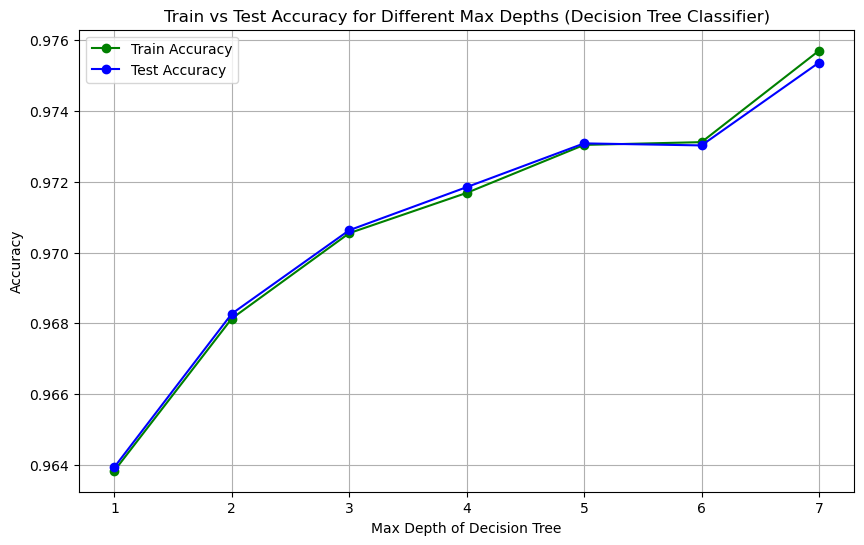

In [73]:
# Function to train and evaluate a classification model
# The function splits the data, trains the model, and returns predictions
def predictive_model_classification(model, x, y, test_size=0.2, random_state=42):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predict on both test and train data
    y_pred_test = model.predict(x_test)  # Predictions for test set
    y_pred_train = model.predict(x_train)  # Predictions for train set
    
    # Return the trained model and predictions for further evaluation
    return model, y_pred_train, y_train, y_pred_test, y_test


# Lists to store the accuracy scores for different max_depth values
train_accuracies = []
test_accuracies = []

# Range of max_depth values to test (1 through 7)
max_depth_values = range(1, 8)

# Loop through each value of max_depth for DecisionTreeClassifier
for max_depth in max_depth_values:
    # Initialize DecisionTreeClassifier with the current max_depth
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    
    # Call the function to train the model and get predictions
    model, y_pred_train, y_train, y_pred_test, y_test = predictive_model_classification(model, x, y)
    
    # Calculate the accuracy score for the training data
    train_acc = accuracy_score(y_train, y_pred_train)
    
    # Calculate the accuracy score for the testing data
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # Append the accuracy scores to the respective lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Create a plot to visualize the train and test accuracy for different max_depth values
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot train accuracy vs. max depth with a green line
plt.plot(max_depth_values, train_accuracies, marker='o', linestyle='-', color='green', label='Train Accuracy')

# Plot test accuracy vs. max depth with a blue line
plt.plot(max_depth_values, test_accuracies, marker='o', linestyle='-', color='blue', label='Test Accuracy')

# Add labels and title to the plot
plt.xlabel('Max Depth of Decision Tree')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Train vs Test Accuracy for Different Max Depths (Decision Tree Classifier)')  # Plot title

# Add a legend to differentiate between train and test accuracy
plt.legend()

# Add grid lines to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()


In [74]:
# checking the columns for the data which has the clustering 
print(clustered_data.columns)

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column6',
       'Column7', 'Column8', 'Column11', 'Column12', 'Column13', 'Column17',
       'Column18', 'target'],
      dtype='object')


In [75]:
# checking the dtypes of the clustered data
clustered_data.dtypes

Column0     float64
Column1       int64
Column2     float64
Column3     float64
Column4     float64
Column6     float64
Column7     float64
Column8     float64
Column11      int64
Column12      int64
Column13      int64
Column17      int64
Column18    float64
target        int64
dtype: object

n_estimators: 1, Train Accuracy: 0.906, Test Accuracy: 0.906
n_estimators: 2, Train Accuracy: 0.906, Test Accuracy: 0.906
n_estimators: 3, Train Accuracy: 0.906, Test Accuracy: 0.906
n_estimators: 4, Train Accuracy: 0.906, Test Accuracy: 0.906
n_estimators: 5, Train Accuracy: 0.906, Test Accuracy: 0.906
n_estimators: 6, Train Accuracy: 0.926, Test Accuracy: 0.926
n_estimators: 7, Train Accuracy: 0.963, Test Accuracy: 0.962
n_estimators: 8, Train Accuracy: 0.965, Test Accuracy: 0.965
n_estimators: 9, Train Accuracy: 0.968, Test Accuracy: 0.967
n_estimators: 10, Train Accuracy: 0.968, Test Accuracy: 0.968
n_estimators: 11, Train Accuracy: 0.968, Test Accuracy: 0.968
n_estimators: 12, Train Accuracy: 0.968, Test Accuracy: 0.968
n_estimators: 13, Train Accuracy: 0.968, Test Accuracy: 0.968
n_estimators: 14, Train Accuracy: 0.968, Test Accuracy: 0.968
n_estimators: 15, Train Accuracy: 0.968, Test Accuracy: 0.968
n_estimators: 16, Train Accuracy: 0.968, Test Accuracy: 0.969
n_estimators: 17,

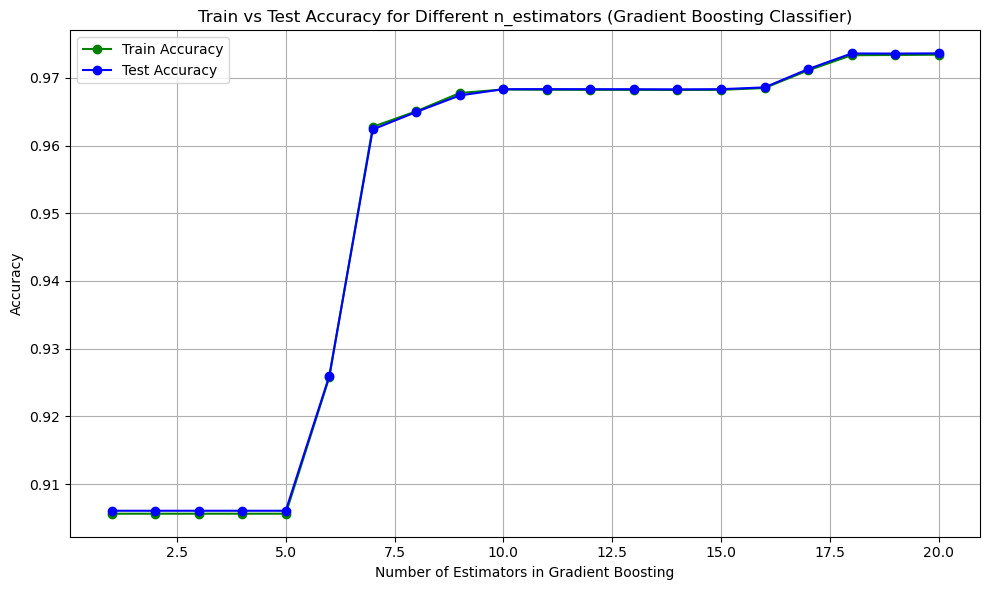

In [79]:
# Function to train and evaluate a classification model
def predictive_model_classification(model, x, y, test_size=0.2, random_state=42):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predict on the test and train data
    y_pred_test = model.predict(x_test)   # Predictions on the test set
    y_pred_train = model.predict(x_train)  # Predictions on the training set
    
    # Return the trained model and predictions for further evaluation
    return model, y_pred_train, y_train, y_pred_test, y_test

# Lists to store accuracy scores for train and test sets
train_accuracies = []
test_accuracies = []

# Range of n_estimators to test (from 1 to 20)
n_estimators_values = range(1, 21)

# Loop through different values of n_estimators
for n_estimators in n_estimators_values:
    # Initialize the GradientBoostingClassifier with the current n_estimators value
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=0.1,  # Keep learning rate constant to control overfitting
        random_state=42
    )
    
    # Train the model and get predictions for both train and test sets
    model, y_pred_train, y_train, y_pred_test, y_test = predictive_model_classification(model, x, y)
    
    # Calculate the accuracy for the training set
    train_acc = accuracy_score(y_train, y_pred_train)
    
    # Calculate the accuracy for the test set
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # Append the calculated accuracies to their respective lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    # Print the accuracies for each value of n_estimators
    print(f'n_estimators: {n_estimators}, Train Accuracy: {train_acc:.3f}, Test Accuracy: {test_acc:.3f}')

# Plotting the Train vs Test Accuracy for different n_estimators values
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the train accuracy as a function of n_estimators
plt.plot(n_estimators_values, train_accuracies, 'o-', color='green', label='Train Accuracy')

# Plot the test accuracy as a function of n_estimators
plt.plot(n_estimators_values, test_accuracies, 'o-', color='blue', label='Test Accuracy')

# Label the X-axis as 'Number of Estimators in Gradient Boosting'
plt.xlabel('Number of Estimators in Gradient Boosting')

# Label the Y-axis as 'Accuracy'
plt.ylabel('Accuracy')

# Title for the plot
plt.title('Train vs Test Accuracy for Different n_estimators (Gradient Boosting Classifier)')

# Add a legend to differentiate between train and test accuracies
plt.legend()

# Add a grid for better readability of the plot
plt.grid(True)

# Optimize the layout of the plot to avoid clipping issues
plt.tight_layout()

# Display the plot
plt.show()


n_estimators: 1, Train Accuracy: 0.906, Correct Train Predictions: 568825/628106
n_estimators: 1, Test Accuracy: 0.906, Correct Test Predictions: 142275/157027
Confusion Matrix for n_estimators=1:
 [[142275      0]
 [ 14752      0]]


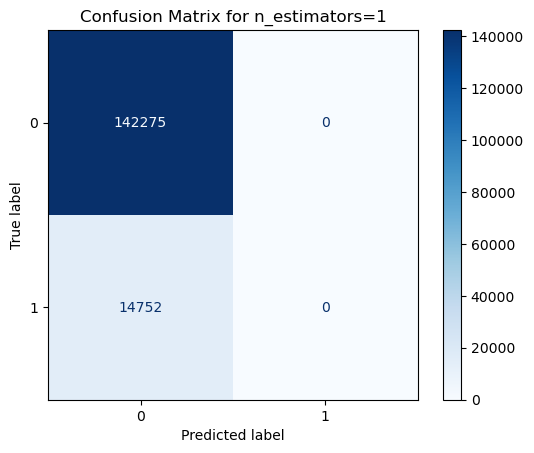

n_estimators: 2, Train Accuracy: 0.906, Correct Train Predictions: 568825/628106
n_estimators: 2, Test Accuracy: 0.906, Correct Test Predictions: 142275/157027
Confusion Matrix for n_estimators=2:
 [[142275      0]
 [ 14752      0]]


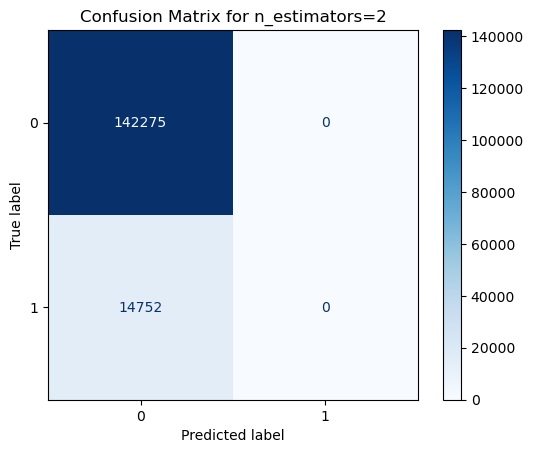

n_estimators: 3, Train Accuracy: 0.906, Correct Train Predictions: 568825/628106
n_estimators: 3, Test Accuracy: 0.906, Correct Test Predictions: 142275/157027
Confusion Matrix for n_estimators=3:
 [[142275      0]
 [ 14752      0]]


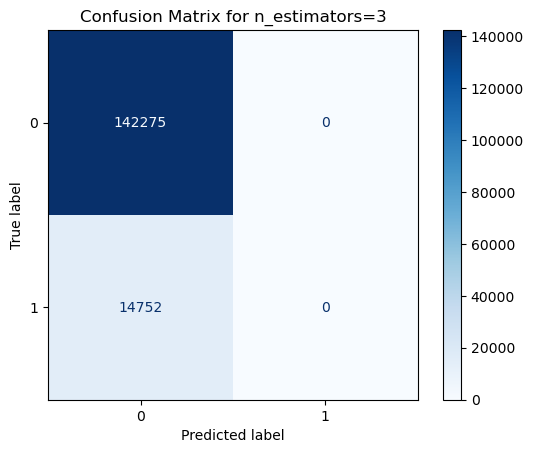

n_estimators: 4, Train Accuracy: 0.906, Correct Train Predictions: 568825/628106
n_estimators: 4, Test Accuracy: 0.906, Correct Test Predictions: 142275/157027
Confusion Matrix for n_estimators=4:
 [[142275      0]
 [ 14752      0]]


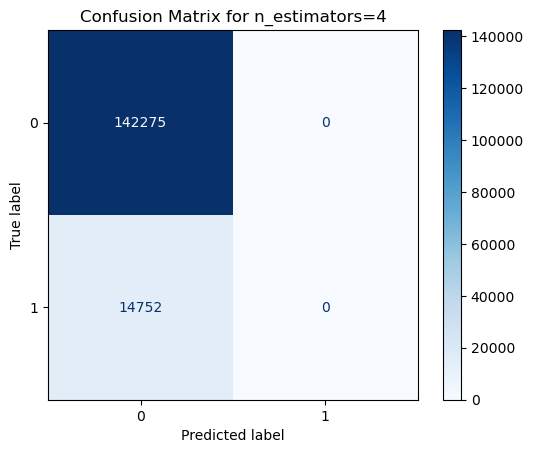

n_estimators: 5, Train Accuracy: 0.908, Correct Train Predictions: 570361/628106
n_estimators: 5, Test Accuracy: 0.908, Correct Test Predictions: 142627/157027
Confusion Matrix for n_estimators=5:
 [[142238     37]
 [ 14363    389]]


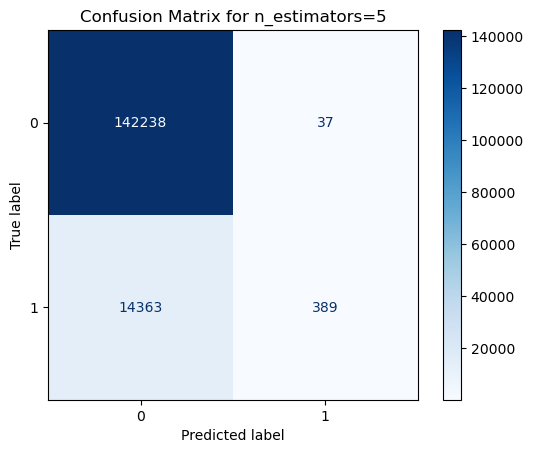

n_estimators: 6, Train Accuracy: 0.925, Correct Train Predictions: 580851/628106
n_estimators: 6, Test Accuracy: 0.925, Correct Test Predictions: 145281/157027
Confusion Matrix for n_estimators=6:
 [[142146    129]
 [ 11617   3135]]


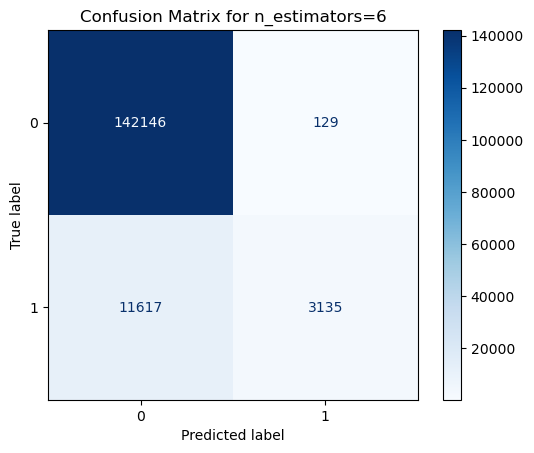

n_estimators: 7, Train Accuracy: 0.938, Correct Train Predictions: 589410/628106
n_estimators: 7, Test Accuracy: 0.939, Correct Test Predictions: 147407/157027
Confusion Matrix for n_estimators=7:
 [[141924    351]
 [  9269   5483]]


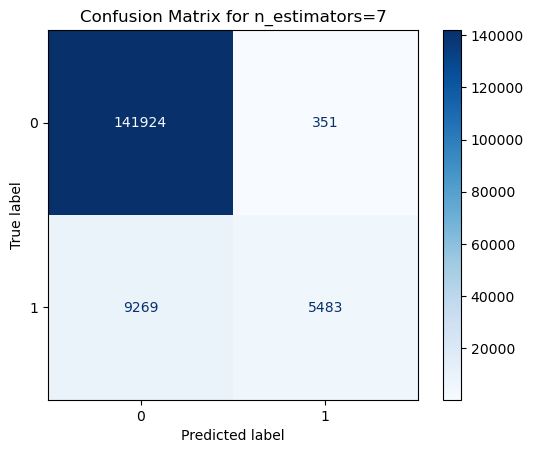

n_estimators: 8, Train Accuracy: 0.958, Correct Train Predictions: 601617/628106
n_estimators: 8, Test Accuracy: 0.958, Correct Test Predictions: 150363/157027
Confusion Matrix for n_estimators=8:
 [[141392    883]
 [  5781   8971]]


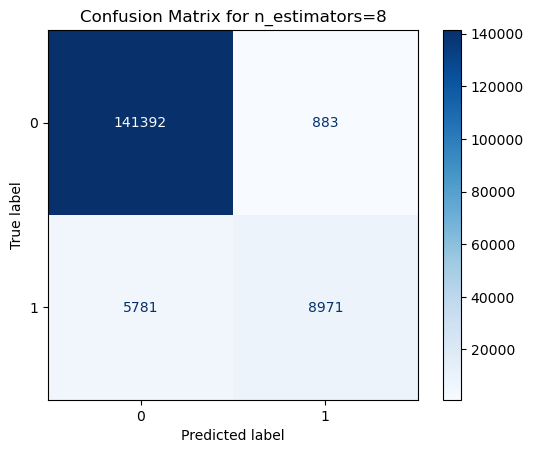

n_estimators: 9, Train Accuracy: 0.959, Correct Train Predictions: 602459/628106
n_estimators: 9, Test Accuracy: 0.959, Correct Test Predictions: 150590/157027
Confusion Matrix for n_estimators=9:
 [[141338    937]
 [  5500   9252]]


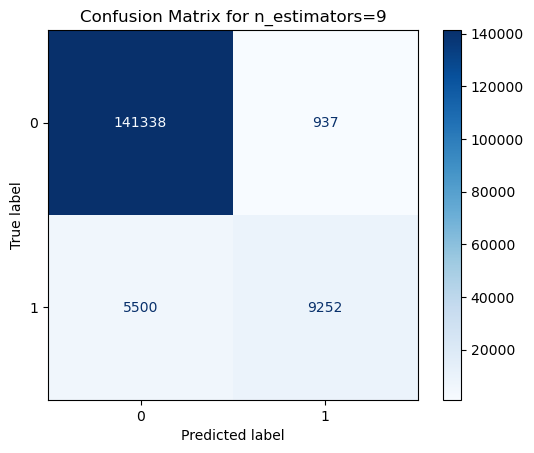

n_estimators: 10, Train Accuracy: 0.964, Correct Train Predictions: 605471/628106
n_estimators: 10, Test Accuracy: 0.964, Correct Test Predictions: 151329/157027
Confusion Matrix for n_estimators=10:
 [[141138   1137]
 [  4561  10191]]


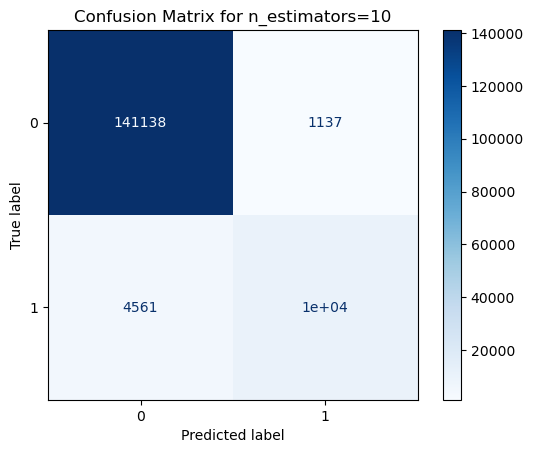

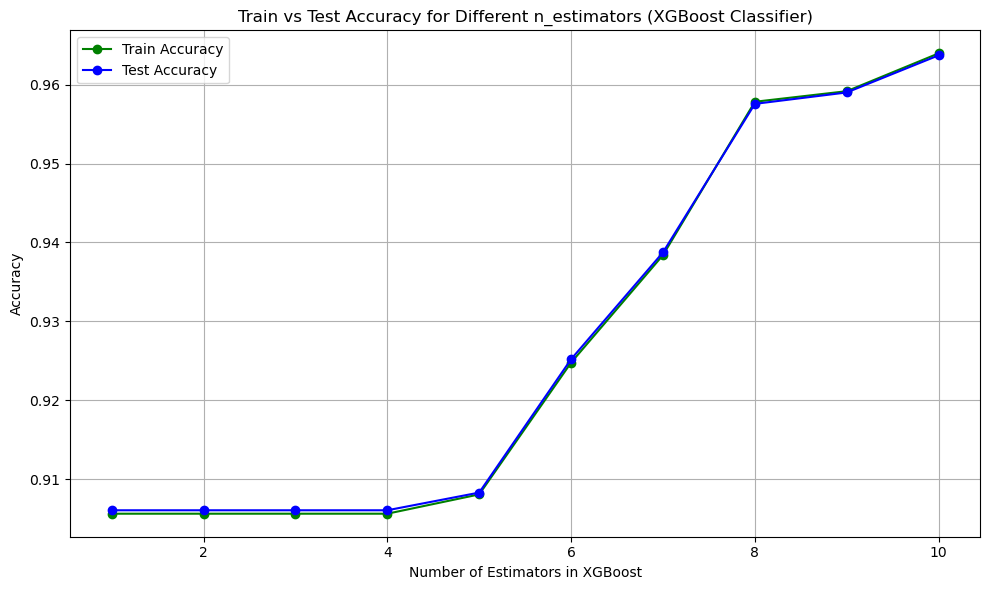

Final Confusion Matrix for the model with the highest n_estimators:
[[141138   1137]
 [  4561  10191]]


In [80]:
def predictive_model_classification(model, x, y, test_size=0.2, random_state=42):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    return model, y_pred_train, y_train, y_pred_test, y_test

train_accuracies = []
test_accuracies = []
final_cm = None  # To store the confusion matrix of the final model
n_estimators_values = range(1, 11)  # Testing various numbers of estimators

for n_estimators in n_estimators_values:
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1,
        reg_alpha=0.1,
        use_label_encoder=False,  # To address the deprecation warning
        eval_metric='logloss'     # To specify a metric for early stopping
    )
    model, y_pred_train, y_train, y_pred_test, y_test = predictive_model_classification(model, x, y)
    
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # Calculate the number of correct predictions
    correct_train_predictions = (y_pred_train == y_train).sum()
    correct_test_predictions = (y_pred_test == y_test).sum()

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # Print the accuracies and the number of correct predictions
    print(f'n_estimators: {n_estimators}, Train Accuracy: {train_acc:.3f}, Correct Train Predictions: {correct_train_predictions}/{len(y_train)}')
    print(f'n_estimators: {n_estimators}, Test Accuracy: {test_acc:.3f}, Correct Test Predictions: {correct_test_predictions}/{len(y_test)}')

    # Confusion Matrix for current iteration
    cm = confusion_matrix(y_test, y_pred_test)
    print(f'Confusion Matrix for n_estimators={n_estimators}:\n', cm)

    # Plot Confusion Matrix using ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for n_estimators={n_estimators}')
    plt.show()

    # Store the final confusion matrix
    final_cm = cm

# Plotting Train vs Test Accuracy for different n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_accuracies, 'o-', color='green', label='Train Accuracy')
plt.plot(n_estimators_values, test_accuracies, 'o-', color='blue', label='Test Accuracy')
plt.xlabel('Number of Estimators in XGBoost')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different n_estimators (XGBoost Classifier)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot and display the final confusion matrix (for the last model)
print("Final Confusion Matrix for the model with the highest n_estimators:")
print(final_cm)
disp = ConfusionMatrixDisplay(confusion_matrix=final_cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Final Confusion Matrix for the Model with the Highest n_estimators')
plt.show()


# TESTING STARTS THE CLUB

In [83]:
# drop the id of the y test not required 
Y_test=Y_test.drop(columns=['ID'])


In [85]:
# combining the both x test and the y test in the one 
X_test['target']=Y_test

In [87]:
# declaring the data_test as the global to use it in any code snippet
global data_test 
# combining the xtest which has the ytest into the one dataset named data_test 
data_test=X_test

In [89]:
# checking the null values of the testing data
print(data_test.isnull().sum())
# checking the shape
print(data_test.shape)

ID               0
Column0          2
Column1          0
Column2          0
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column7          0
Column8       1234
Column9     243853
Column10         0
Column11         0
Column12         0
Column13         0
Column14    121679
Column15      5485
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
target           0
dtype: int64
(261712, 24)


In [91]:
# checking the duplicates
data_test.duplicated().sum()

0

In [93]:
# checking the unqiue values
data_test.nunique()

ID          261712
Column0         19
Column1       2548
Column2       8913
Column3         47
Column4         47
Column5      59586
Column6      60716
Column7      68358
Column8     134980
Column9      16963
Column10         2
Column11         2
Column12         2
Column13         2
Column14     21948
Column15     24084
Column16         2
Column17       124
Column18        11
Column19         2
Column20         2
Column21         2
target           2
dtype: int64

In [95]:
# dropping the unwanted columns
data_test=data_test.drop(columns=['ID'])
data_test=data_test.drop(columns=['Column5'])
data_test=data_test.drop(columns=['Column9'])
data_test=data_test.drop(columns=['Column14'])
data_test=data_test.drop(columns=['Column15'])

In [ ]:
# scatter plot for cheking the relationship of the columns 
columns=data_test.columns
for col1,col2 in combinations(columns,2):
    plt.subplots(figsize=(20,8))
    plt.scatter(data_test[col1],data_test[col2])
    plt.title('scatterr plot')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

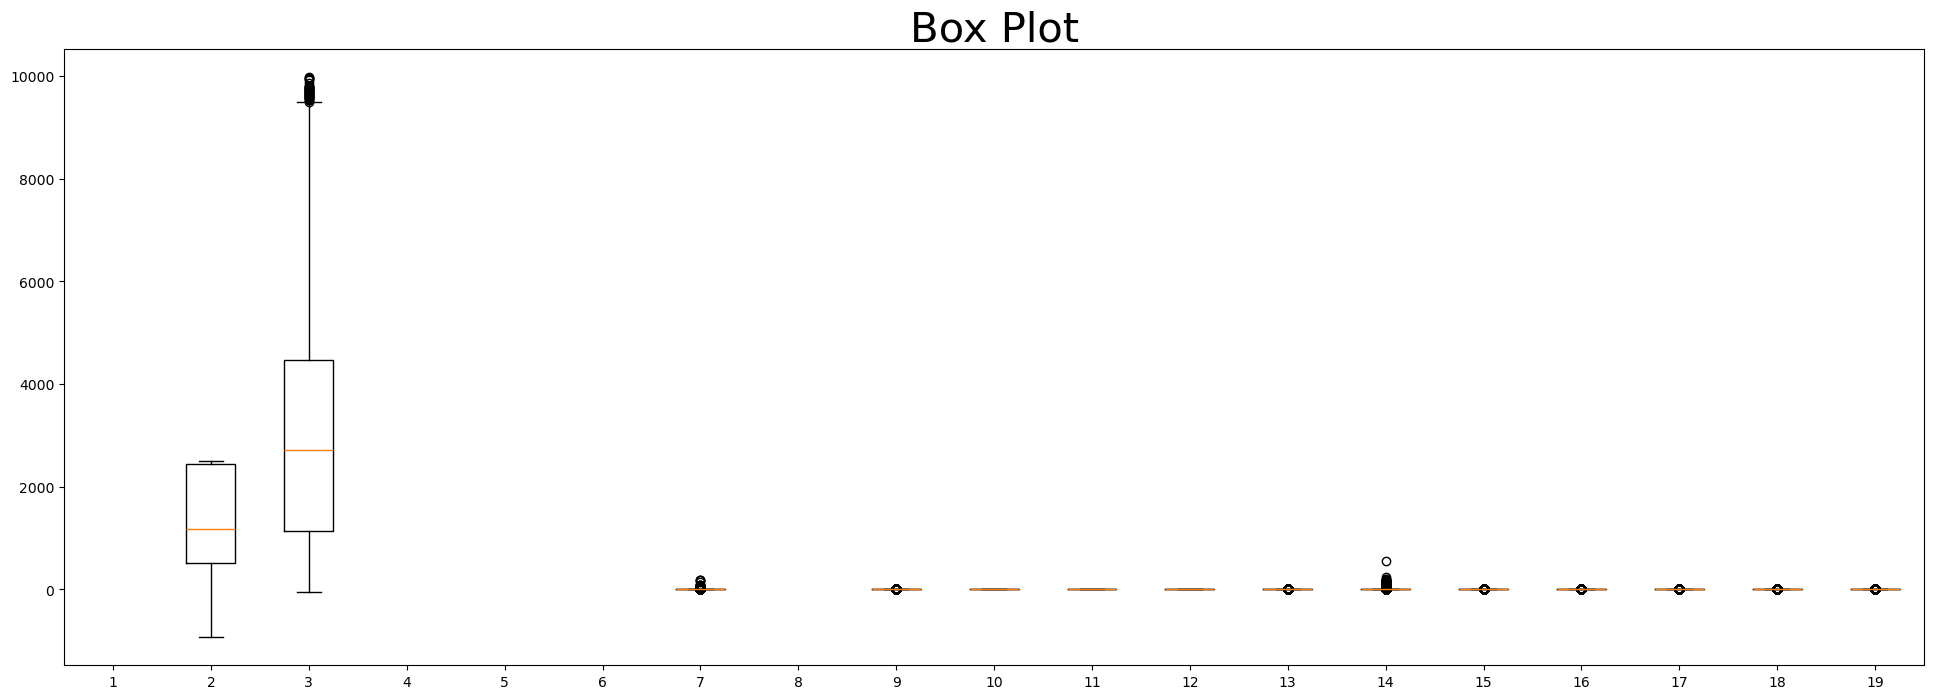

In [99]:
# plotting the box plot for checking the outliers
plt.subplots(figsize=(24,8))
plt.boxplot(data_test)
plt.title('Box Plot',fontsize=30)
plt.show()

In [101]:
def Mice_Imputation(data_test,k):
    # Intialize the RandomForest Model with the n_jobs=-1 for the parallel processing
    model=RandomForestRegressor(n_jobs=-1)
    n=0
    while n < k:
        # making the copy of the dataset for avoiding modifyinng the orginal data directly 
        data_copy=data_test.copy()  
        # temporarly filling  all Columns by the median to prepare for training 
        data_copy['Column0'] = data_copy['Column0'].fillna(data_copy['Column0'].median())
        data_copy['Column3'] = data_copy['Column3'].fillna(data_copy['Column3'].median())
        data_copy['Column4'] = data_copy['Column4'].fillna(data_copy['Column4'].median())
        # checking if the column0 exist and contain null values to impute 
        if 'Column0' in data_test.columns and data_test['Column0'].isnull().sum() >0:
            # train the model using available data from column3 and column4
            train_data=data_copy.loc[data_copy['Column0'].notnull() & data_copy['Column3'].notnull() & data_copy['Column4'].notnull(),['Column3','Column4']]
            target_data=data_copy.loc[data_copy['Column0'].notnull(),'Column0']
            
            # check if there is the sufficent data for training
            if len(train_data) >0:
                model.fit(train_data,target_data)
                # Prepare test data where Column0 is null and the other columns are not null
                test_data=data_copy.loc[data_copy['Column0'].isnull() & data_copy['Column3'].notnull() & data_copy['Column4'].notnull(),['Column3','Column4']]
                # checking if their is the sufficent data for testing 
                if len(test_data) > 0: 
                    # predict the missing values in column 0 and update the data copy
                    y_pred_0=model.predict(test_data)
                    data_copy.loc[data_copy['Column0'].isnull() & data_copy['Column3'].notnull() & data_copy['Column4'].notnull(),'Column0']=y_pred_0
                    
        # checking if the column3 exist and contain null values to impute              
        if 'Column3' in data_test.columns and data_test['Column3'].isnull().sum() >0:
            # train the model using the available data for the column0 and column4
            train_data=data_copy.loc[data_copy['Column3'].notnull() & data_copy['Column0'].notnull() & data_copy['Column4'].notnull(),['Column0','Column4']]
            target_data=data_copy.loc[data_copy['Column3'].notnull(),'Column3']
            # check if there is the sufficent data for training
            if len(train_data) > 0:
                model.fit(train_data,target_data)
                # Prepare test data where Column3 is null and the other columns are not null
                test_data=data_copy.loc[data_copy['Column3'].isnull() & data_copy['Column0'].notnull() & data_copy['Column4'].notnull(),['Column0','Column4']]
                 # checking if their is the sufficent data for testing 
                if len(test_data) > 0:
                    # predict the missing values in column 3 and update the data copy
                    y_pred_3=model.predict(test_data)
                    data_copy.loc[data_copy['Column3'].isnull() & data_copy['Column0'].notnull() & data_copy['Column4'].notnull(),'Column3']=y_pred_3
                    
        # checking if the column3 exist and contain null values to impute
        if 'Column4' in data_test.columns and data_test['Column4'].isnull().sum() >0:
            train_data=data_copy.loc[data_copy['Column4'].notnull() & data_copy['Column0'].notnull() & data_copy['Column3'].notnull(),['Column0','Column3']]
            target_data=data_copy.loc[data_copy['Column4'].notnull(),'Column4']
            # check if there is the sufficent data for training
            if len(train_data) > 0:
                model.fit(train_data,target_data)
                # Prepare test data where Column4 is null and the other columns are not null
                test_data = data_copy.loc[data_copy['Column4'].isnull() & data_copy['Column0'].notnull() & data_copy['Column3'].notnull(), ['Column0', 'Column3']]
                if len(test_data) > 0:
                    # predict the missing values in column 4 and update the data copy
                    y_pred_4=model.predict(test_data)
                    data_copy.loc[data_copy['Column4'].isnull() & data_copy['Column0'].notnull() & data_copy['Column3'].notnull(),'Column3']=y_pred_4
        # Update the orginal data with the imputed values from data_copy
        data_test.update(data_copy)
        # increment the iteration counter
        n += 1
    # return the imputed data
    return data_test

# call the MICE Imputation function with the 2 iterations
result_data = Mice_Imputation(data_test, k=2)

In [103]:
def Mice_Imputation(data_test,k):
    # Intialize the RandomForest Model with the n_jobs=-1 for the parallel processing
    model = RandomForestRegressor(n_jobs=-1)  
    n = 0  

    while n<k:
        # making the copy of the dataset for avoiding modifyinng the orginal data directly
        data_copy=data_test.copy()  
        # temporarly filling  all Columns by the median to prepare for training
        data_copy['Column6']=data_copy['Column6'].fillna(data_copy['Column6'].median())
        data_copy['Column8']=data_copy['Column8'].fillna(data_copy['Column8'].median())
        # checking if the column6 exist and contain null values to impute
        if 'Column6' in data_test.columns and data_test['Column6'].isnull().sum() >0:
            # train the model using available data from column8
            train_data=data_copy.loc[data_copy['Column6'].notnull() & data_copy['Column8'].notnull(),['Column8']]
            target_data=data_copy.loc[data_copy['Column6'].notnull(),'Column6']
            # check if there is the sufficent data for training
            if len(train_data)>0:
                model.fit(train_data,target_data)
                # Prepare test data where Column6 is null and the other columns are not null
                test_data = data_copy.loc[data_copy['Column6'].isnull() & data_copy['Column8'].notnull(), ['Column8']]
                # checking if their is the sufficent data for testing
                if len(test_data) > 0:
                    # predict the missing values in column 6 and update the data copy
                    y_pred_6 = model.predict(test_data)
                    data_copy.loc[data_copy['Column6'].isnull() & data_copy['Column8'].notnull(),'Column6']=y_pred_6
# imputing the  column8
        # checking if the column8 exist and contain null values to impute
        if 'Column8' in data_test.columns and data_test['Column8'].isnull().sum() >0:
            # train the model using available data from column6
            train_data=data_copy.loc[data_copy['Column8'].notnull() & data_copy['Column6'].notnull(),['Column6']]
            target_data=data_copy.loc[data_copy['Column8'].notnull() ,'Column8']
            # check if there is the sufficent data for training
            if len(train_data) > 0:
                model.fit(train_data,target_data)
                # Prepare test data where Column8 is null and the other columns are not null
                test_data=data_copy.loc[data_copy['Column8'].isnull() & data_copy['Column6'].notnull(),['Column6']]
                # checking if their is the sufficent data for testing
                if len(test_data)>0:
                    # predict the missing values in column 8 and update the data copy
                    y_pred_8=model.predict(test_data)
                    data_copy.loc[data_copy['Column8'].isnull() & data_copy['Column6'].notnull(),'Column8']=y_pred_8
                    
        # Update the orginal data with the imputed values from data_copy
        data_test.update(data_copy)
        # increment the iteration counter
        n += 1
    # return the imputed data
    return data_test
# call the MICE Imputation function with the 2 iterations
result_data = Mice_Imputation(data_test, k=2)

In [104]:
# checking the null values after the MICE imputation
data_test.isnull().sum()

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column6     0
Column7     0
Column8     0
Column10    0
Column11    0
Column12    0
Column13    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
target      0
dtype: int64

In [ ]:
def plot_histogram(data_test,bins=30,kde=True):
    for col in data.columns:
        plt.subplots(figsize=(20,8))
        plt.hist(data_test[col],bins=bins,kde=kde)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [105]:
def zscore(data_test,threshold=3):
    non_constant_columns=data_test.loc[:,data_test.apply(lambda col:col.std()!=0)]
    if non_constant_columns.empty:
        print('Non constant columns found to apply zscore')
        return data_test
    mean=np.mean(non_constant_columns)
    std_dev=np.std(non_constant_columns)
    z_scores=(non_constant_columns-mean)/std_dev
    filter_outlier=non_constant_columns[(np.abs(z_scores)<=threshold).any(axis=1)]
    return filter_outlier
cleaned_data=zscore(data_test,threshold=3)
print(cleaned_data)

        Column0  Column1  Column2   Column3   Column4   Column6   Column7  \
0           1.0     1986     53.0  0.678139  0.701403 -0.407939 -0.015607   
1           2.0     1579     12.0  0.678139  0.701403 -0.407939 -0.015607   
2           0.0      898   3817.0 -2.028572 -1.855728 -0.407939 -0.015607   
3           0.0       79   3449.0 -0.675216 -0.577162  0.004020 -0.015607   
4           1.0      646   6510.0 -2.028572 -1.855728 -0.407939 -0.015434   
...         ...      ...      ...       ...       ...       ...       ...   
261707      2.0     2495   4155.0 -2.028572  0.381762 -0.396521 -0.015607   
261708      0.0        1   1178.0  0.678139  0.701403 -0.407939 -0.015607   
261709      0.0     1321   1356.0  0.678139  0.701403 -0.369193 -0.015607   
261710      0.0      589   1731.0 -2.028572 -1.855728 -0.407939 -0.015607   
261711      2.0      963     14.0  0.678139  0.701403 -0.122341 -0.015607   

         Column8  Column10  Column11  Column12  Column13  Column16  Column1

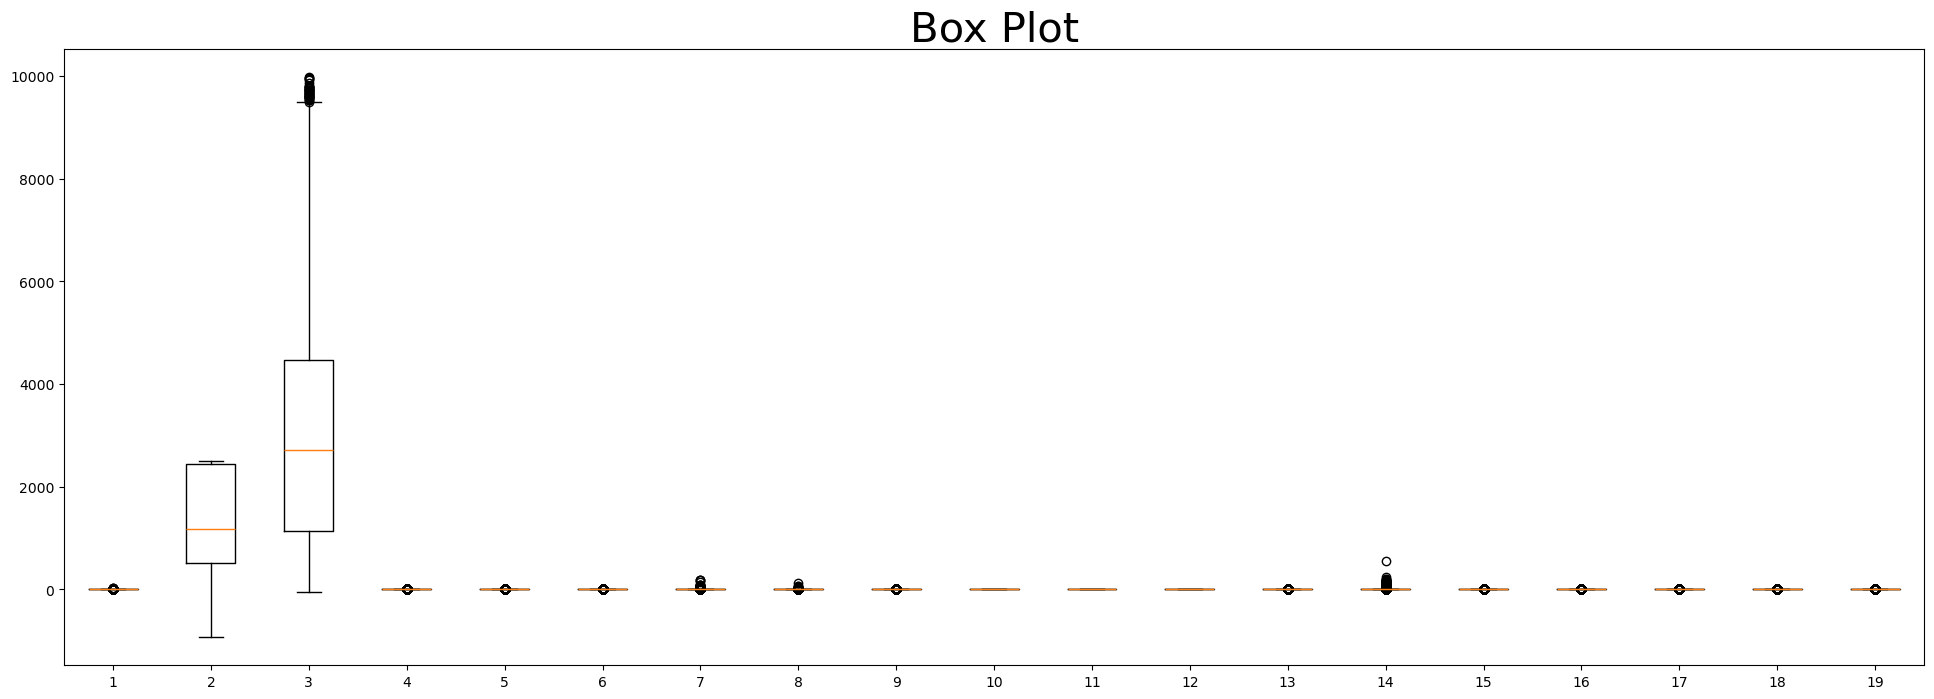

In [106]:
plt.subplots(figsize=(24,8))
plt.boxplot(data_test)
plt.title('Box Plot',fontsize=30)
plt.show()

In [107]:
def skewness_find(data_test):
    n=len(data_test)
    n_1=n-1
    n_2=n-2
    mean=np.mean(data_test)
    variance_n=np.sum((data_test-mean)**2)/n
    std_dev=np.sqrt(variance_n)
    skewness=(n/(n_1*n_2))*np.sum(((data_test-mean)/std_dev)**3)
    return skewness
skewness_value=skewness_find(data_test)
print(f"Skewness: {skewness_value}")


Skewness: Column0    -1.000051
Column1     1.417386
Column2     1.490146
Column3    -1.000038
Column4    -1.000038
Column6    -1.000041
Column7    -1.000029
Column8    -1.000034
Column10   -1.000017
Column11   -1.000018
Column12   -1.000018
Column13   -1.000018
Column16   -1.000011
Column17   -1.000218
Column18   -1.000017
Column19   -1.000012
Column20   -1.000012
Column21   -1.000012
target     -1.000014
dtype: float64


In [108]:
data_test=data_test.drop(columns=['Column16'])
data_test=data_test.drop(columns=['Column20'])
data_test=data_test.drop(columns=['Column21'])

In [109]:
data_test

Column0  Column1  Column2   Column3   Column4   Column6   Column7  \
0           1.0     1986     53.0  0.678139  0.701403 -0.407939 -0.015607   
1           2.0     1579     12.0  0.678139  0.701403 -0.407939 -0.015607   
2           0.0      898   3817.0 -2.028572 -1.855728 -0.407939 -0.015607   
3           0.0       79   3449.0 -0.675216 -0.577162  0.004020 -0.015607   
4           1.0      646   6510.0 -2.028572 -1.855728 -0.407939 -0.015434   
...         ...      ...      ...       ...       ...       ...       ...   
261707      2.0     2495   4155.0 -2.028572  0.381762 -0.396521 -0.015607   
261708      0.0        1   1178.0  0.678139  0.701403 -0.407939 -0.015607   
261709      0.0     1321   1356.0  0.678139  0.701403 -0.369193 -0.015607   
261710      0.0      589   1731.0 -2.028572 -1.855728 -0.407939 -0.015607   
261711      2.0      963     14.0  0.678139  0.701403 -0.122341 -0.015607   

         Column8  Column10  Column11  Column12  Column13  Column17  Column18  \
0       0.554860         1         1         1         1         0       0.0   
1       0.142149         0         1         1         0         0       0.0   
2      -0.774979         0         0         0         0         0       0.0   
3       0.635264         0         1         0         1         0       0.0   
4      -0.774979         1         1         1         1         0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
261707  0.454627         0         0         1         0         0       0.0   
261708 -0.774979         0         0         0         0         0       0.0   
261709  0.912784         0         0         0         0         0       0.0   
261710 -0.774979         0         0         0         0         0       0.0   
261711  1.170911         0         0         1         1         0       0.0   

        Column19  target  
0              0       0  
1              0       0  
2              0       0  
3              0       0  
4              0       0  
...          ...     ...  
261707         0       0  
261708         0       0  
261709         0       0  
261710         0       0  
261711         0       0  

[261712 rows x 16 columns]

In [117]:
# Function for changing the labels 
def ChangeLabel(temp_data,cluster_labels,label):
    # Assign the Cluster Labels to the rows with the specified target labels
    temp_data.loc[temp_data['target']==label,'ClusterLabel']=cluster_labels
# Function to dynamically calculate the K Value for each class based on the size of the class 
def dynamic_k_calculation(data,min_clusters=2,max_clusters=10):
    # get the unique target classes and their counts
    unique_classes=data_test['target'].unique()
    class_counts=data_test['target'].value_counts()
    
    K={} # Dictonary to store k values for each class   
    for label in unique_classes:
        # Calculate the class size and determine  the k value for clustering 
        class_size=class_counts[label]
        k_value = max(min_clusters,min(int(math.sqrt(class_size)), max_clusters))
        K[label]=k_value
        
    return K # return the dictionary with the k values for each target class  
    
# Function for performing the local clustering
def Clustering_Local(data_test,K):
    # Make the copy and intialize the clusterlabel with the -1
    temp_data=data_test.copy()
    temp_data['ClusterLabel']=-1
    unique_classes=temp_data['target'].unique()
    
    for label in unique_classes:
        print(f"Processing class :{label}")
        # Filter data for the current class and drop 'target' and 'ClusterLabel' columns from features
        class_data=temp_data[temp_data['target']==label]
        features=class_data.drop(columns=['target','ClusterLabel'],errors='ignore')
        # get the k value for the current class
        k_value=K[label]
        # perform clustering if the class size is greater than or equal to k
        if len(class_data) >=k_value:
            kmeans = KMeans(n_clusters=k_value, random_state=42)
            cluster_labels = kmeans.fit_predict(features)
            ChangeLabel(temp_data, cluster_labels, label)
        else:
            # if the class size is too small,assign all points to the same cluster
            temp_data.loc[temp_data['target'] == label, 'ClusterLabel'] = 0
    
    return temp_data #return the data with the cluster labels 
# Function to handle any missing cluster labels (NAN values) 
def handle_missing_cluster_labels(temp_data):
    nan_count = temp_data['ClusterLabel'].isna().sum()
    if nan_count >0:
        print('NaN values found, handling them')
        # replace the nan values by the frequent mode of the each class
        temp_data['ClusterLabel'] = temp_data.groupby('target')['ClusterLabel'].apply(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty() else -1))
    else:
        print("No NaN values found in ClusterLabel.")

# Function to compute the joint probability for mutual info calculation
def joint_prob_mutual_info(feature, labels):
    # create the cross tabulation to compute joint probabilites
    joint_prob_df=pd.crosstab(feature,labels,normalize=True)
    return joint_prob_df
# Function to perform marginal probabilities for mutual information calculation
def marginal_prob_mutual_info(feature,labels):
    joint_prob_df = pd.crosstab(feature, labels,normalize=True)
    # Compute the Marginal Probabilities for features and the labels
    marginal_prob_feature = joint_prob_df.sum(axis=1)  
    marginal_prob_labels = joint_prob_df.sum(axis=0)   
    
    return marginal_prob_feature, marginal_prob_labels
# Function to compute the mutual Information for each feature based on joint and marginal probabilities
def mutual_info_classify_fused(data_test, labels):
    feature_scores = {}
    for col in data_test.columns:
        feature = data_test[col]
        # Compute joint and marginal probabilities for the current feature
        Joint_Prob = joint_prob_mutual_info(feature, labels)
        Marginal_Prob_Feature, Marginal_Prob_Labels = marginal_prob_mutual_info(feature, labels)
        
        mutual_info = 0
        Joint_Prob_values = Joint_Prob.values.flatten()
        Marginal_Prob_Feature_values = np.repeat(Marginal_Prob_Feature.values, Joint_Prob.shape[1])
        Marginal_Prob_Labels_values = np.tile(Marginal_Prob_Labels.values, Joint_Prob.shape[0])
        # Compute the mutual information using the formula based on the marginal and the joint probabilities
        non_zero_joint = Joint_Prob_values > 0
        mutual_info += np.sum(
            Joint_Prob_values[non_zero_joint] * np.log(
                Joint_Prob_values[non_zero_joint] / 
                (Marginal_Prob_Feature_values[non_zero_joint] * Marginal_Prob_Labels_values[non_zero_joint])
            )
        )
        # Store the mutual information score for the current feature 
        feature_scores[col] = mutual_info
        print(f"Mutual Information for {col}: {mutual_info}")
    
    return feature_scores #return the dictonary of the mutual information scores for the features

def ranking_descending_order(feature_scores, M):
    # Sort the features by mutual information score in descending order
    ranked_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
    # Select the top M features
    top_features = [feature for feature,score in ranked_features[:M]]
    print(f"Top {M} features: {top_features}")
    return top_features

# Step 1: Calculate dynamic k values for each class
K = dynamic_k_calculation(data_test)

# Step 2: Perform local clustering based on dynamic k values
temp_clustered_data = Clustering_Local(data_test, K)

# Step 3: Handle missing cluster labels in the clustered data
handle_missing_cluster_labels(temp_clustered_data)

# Step 4: Calculate mutual information for features based on cluster labels
labels = temp_clustered_data['ClusterLabel']
feature_scores = mutual_info_classify_fused(temp_clustered_data.drop(columns=['target', 'ClusterLabel']), labels)
# Step 5: Rank the features based on mutual information and select the top M features
M = 13  
top_features = ranking_descending_order(feature_scores, M)

# Step 6: Create a newdataset with the top features and target column, then save to a CSV file
data_updated_test = temp_clustered_data[top_features + ['target']]  
data_updated_test.to_csv('test_clustered_top_features.csv', index=False)

# Step 7: Notify that the data has been saved
print("Data saved to 'test_clustered_top_features.csv'")


Processing class :0
Processing class :1
No NaN values found in ClusterLabel.
Mutual Information for Column0: 0.07816379122113759
Mutual Information for Column1: 0.6206681194665079
Mutual Information for Column2: 1.4612678376289812
Mutual Information for Column3: 0.054300364456102534
Mutual Information for Column4: 0.07528513808962072
Mutual Information for Column6: 0.5730764859394776
Mutual Information for Column7: 0.6793759424028476
Mutual Information for Column8: 1.2470836319777567
Mutual Information for Column10: 0.002480444493232206
Mutual Information for Column11: 0.004495936692430807
Mutual Information for Column12: 0.008627820479253041
Mutual Information for Column13: 0.004380433671891551
Mutual Information for Column17: 0.010610031735417677
Mutual Information for Column18: 0.014625183862630097
Mutual Information for Column19: 0.0031896893443820527
Top 13 features: ['Column2', 'Column8', 'Column7', 'Column1', 'Column6', 'Column0', 'Column4', 'Column3', 'Column18', 'Column17', 'C

In [118]:
df_test= pd.DataFrame(data_updated_test)

In [119]:
ascending_order=['Column0','Column1','Column2','Column3','Column4','Column6','Column7','Column8','Column11','Column12','Column13','Column17','Column18','target']
clustered_data_test=df_test[ascending_order]
print(clustered_data_test)

        Column0  Column1  Column2   Column3   Column4   Column6   Column7  \
0           1.0     1986     53.0  0.678139  0.701403 -0.407939 -0.015607   
1           2.0     1579     12.0  0.678139  0.701403 -0.407939 -0.015607   
2           0.0      898   3817.0 -2.028572 -1.855728 -0.407939 -0.015607   
3           0.0       79   3449.0 -0.675216 -0.577162  0.004020 -0.015607   
4           1.0      646   6510.0 -2.028572 -1.855728 -0.407939 -0.015434   
...         ...      ...      ...       ...       ...       ...       ...   
261707      2.0     2495   4155.0 -2.028572  0.381762 -0.396521 -0.015607   
261708      0.0        1   1178.0  0.678139  0.701403 -0.407939 -0.015607   
261709      0.0     1321   1356.0  0.678139  0.701403 -0.369193 -0.015607   
261710      0.0      589   1731.0 -2.028572 -1.855728 -0.407939 -0.015607   
261711      2.0      963     14.0  0.678139  0.701403 -0.122341 -0.015607   

         Column8  Column11  Column12  Column13  Column17  Column18  target 

In [124]:
# Save the modified DataFrame back to the original CSV file
clustered_data_test.to_csv('test_clustered_top_features.csv', index=False)

In [126]:
# # merged the training and the testing data
# import pandas as pd
# merged_data=pd.concat([clustered_data,clustered_data_test],axis=0)

In [128]:
# # printing the merge data
# merged_data

In [130]:
print(clustered_data.columns)

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column6',
       'Column7', 'Column8', 'Column11', 'Column12', 'Column13', 'Column17',
       'Column18', 'target'],
      dtype='object')


In [132]:
print(clustered_data_test.columns)

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column6',
       'Column7', 'Column8', 'Column11', 'Column12', 'Column13', 'Column17',
       'Column18', 'target'],
      dtype='object')


In [134]:
clustered_data_test.reset_index(drop=True,inplace=True)
merged_data=pd.concat([clustered_data,clustered_data_test],ignore_index=True)
print(merged_data.index.min())
print(merged_data.index.max())


0
1046844


In [136]:
merged_data

Column0  Column1  Column2   Column3   Column4   Column6   Column7  \
0            2.0     2495   3726.0  0.678139  0.701403  0.434190 -0.015603   
1            0.0     2495   3454.0  0.452580  0.701403  1.554998 -0.015574   
2            2.0     2495   4543.0 -1.577453 -1.429540 -0.407939 -0.015607   
3            0.0      211     59.0  0.678139  0.701403 -0.407939 -0.015607   
4            0.0      718    950.0 -2.028572 -1.855728 -0.407939 -0.015607   
...          ...      ...      ...       ...       ...       ...       ...   
1046840      2.0     2495   4155.0 -2.028572  0.381762 -0.396521 -0.015607   
1046841      0.0        1   1178.0  0.678139  0.701403 -0.407939 -0.015607   
1046842      0.0     1321   1356.0  0.678139  0.701403 -0.369193 -0.015607   
1046843      0.0      589   1731.0 -2.028572 -1.855728 -0.407939 -0.015607   
1046844      2.0      963     14.0  0.678139  0.701403 -0.122341 -0.015607   

          Column8  Column11  Column12  Column13  Column17  Column18  target  
0        0.606265         0         0         0         0       0.0       0  
1        0.329946         0         0         0         0       0.0       0  
2       -0.774979         1         1         1         0       0.0       0  
3       -0.774979         0         0         0         0       1.0       1  
4       -0.774979         0         0         0         0       0.0       0  
...           ...       ...       ...       ...       ...       ...     ...  
1046840  0.454627         0         1         0         0       0.0       0  
1046841 -0.774979         0         0         0         0       0.0       0  
1046842  0.912784         0         0         0         0       0.0       0  
1046843 -0.774979         0         0         0         0       0.0       0  
1046844  1.170911         0         1         1         0       0.0       0  

[1046845 rows x 14 columns]

In [138]:
# merged data to the another csv file 
merged_data.to_csv('merged_data.csv', index=False)

print("Merged data saved to 'merged_data.csv' successfully!")


Merged data saved to 'merged_data.csv' successfully!


In [139]:
x=merged_data.drop(columns=['target'],axis=1)
y=merged_data['target']

# DTR

Max Depth: 1
Train Accuracy: 0.9638
Test Accuracy: 0.9636
Precision: 0.7207
Recall: 1.0000
F1 Score: 0.8377
AUC-ROC: 0.9799
Log Loss: 0.0772
Balanced Accuracy: 0.9799



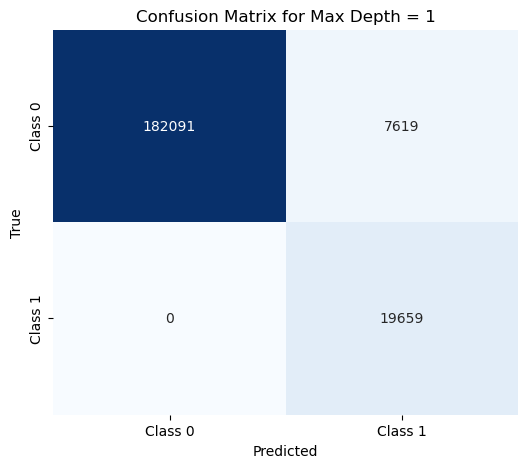

Max Depth: 2
Train Accuracy: 0.9684
Test Accuracy: 0.9680
Precision: 0.8586
Recall: 0.7898
F1 Score: 0.8227
AUC-ROC: 0.8881
Log Loss: 0.0654
Balanced Accuracy: 0.8881



Max Depth: 3
Train Accuracy: 0.9704
Test Accuracy: 0.9702
Precision: 0.7629
Recall: 0.9911
F1 Score: 0.8622
AUC-ROC: 0.9796
Log Loss: 0.0611
Balanced Accuracy: 0.9796



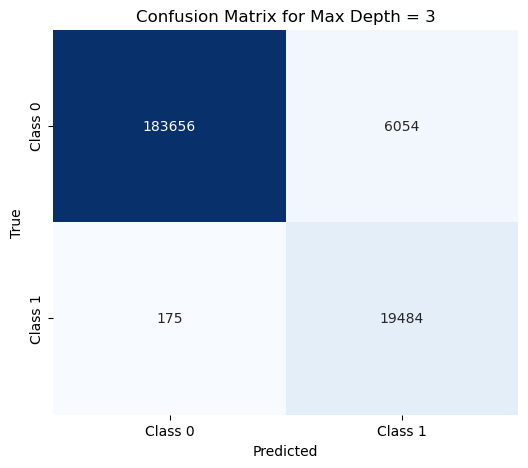

Max Depth: 4
Train Accuracy: 0.9716
Test Accuracy: 0.9715
Precision: 0.7711
Recall: 0.9907
F1 Score: 0.8672
AUC-ROC: 0.9801
Log Loss: 0.0592
Balanced Accuracy: 0.9801



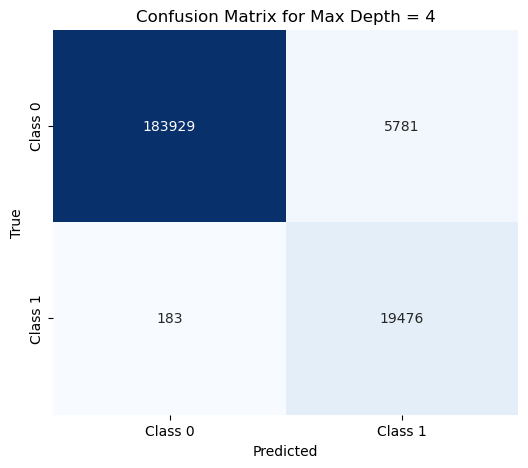

Max Depth: 5
Train Accuracy: 0.9730
Test Accuracy: 0.9728
Precision: 0.7911
Recall: 0.9655
F1 Score: 0.8696
AUC-ROC: 0.9695
Log Loss: 0.0581
Balanced Accuracy: 0.9695



Max Depth: 6
Train Accuracy: 0.9733
Test Accuracy: 0.9731
Precision: 0.8405
Recall: 0.8804
F1 Score: 0.8600
AUC-ROC: 0.9315
Log Loss: 0.0568
Balanced Accuracy: 0.9315



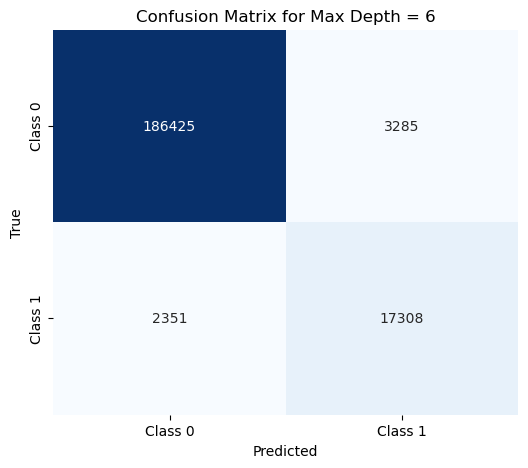

Max Depth: 7
Train Accuracy: 0.9757
Test Accuracy: 0.9752
Precision: 0.8244
Recall: 0.9345
F1 Score: 0.8760
AUC-ROC: 0.9570
Log Loss: 0.0560
Balanced Accuracy: 0.9570



Max Depth: 8
Train Accuracy: 0.9760
Test Accuracy: 0.9755
Precision: 0.8273
Recall: 0.9338
F1 Score: 0.8773
AUC-ROC: 0.9568
Log Loss: 0.0556
Balanced Accuracy: 0.9568



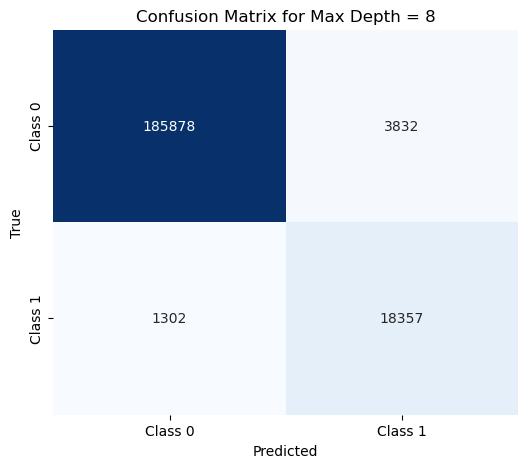

Max Depth: 9
Train Accuracy: 0.9767
Test Accuracy: 0.9758
Precision: 0.8330
Recall: 0.9286
F1 Score: 0.8782
AUC-ROC: 0.9546
Log Loss: 0.0579
Balanced Accuracy: 0.9546



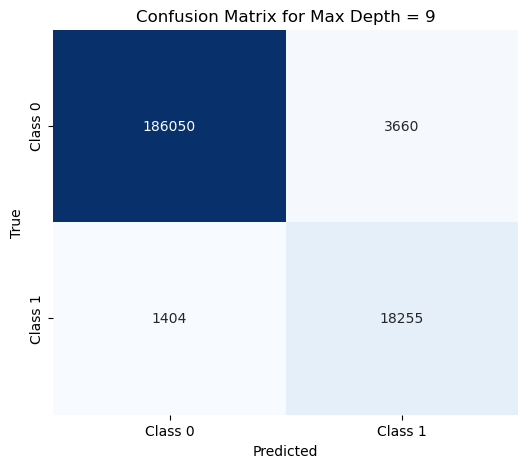

Max Depth: 10
Train Accuracy: 0.9772
Test Accuracy: 0.9760
Precision: 0.8323
Recall: 0.9329
F1 Score: 0.8797
AUC-ROC: 0.9567
Log Loss: 0.0624
Balanced Accuracy: 0.9567



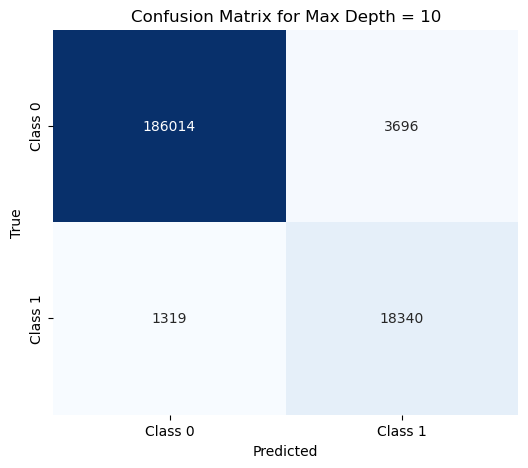

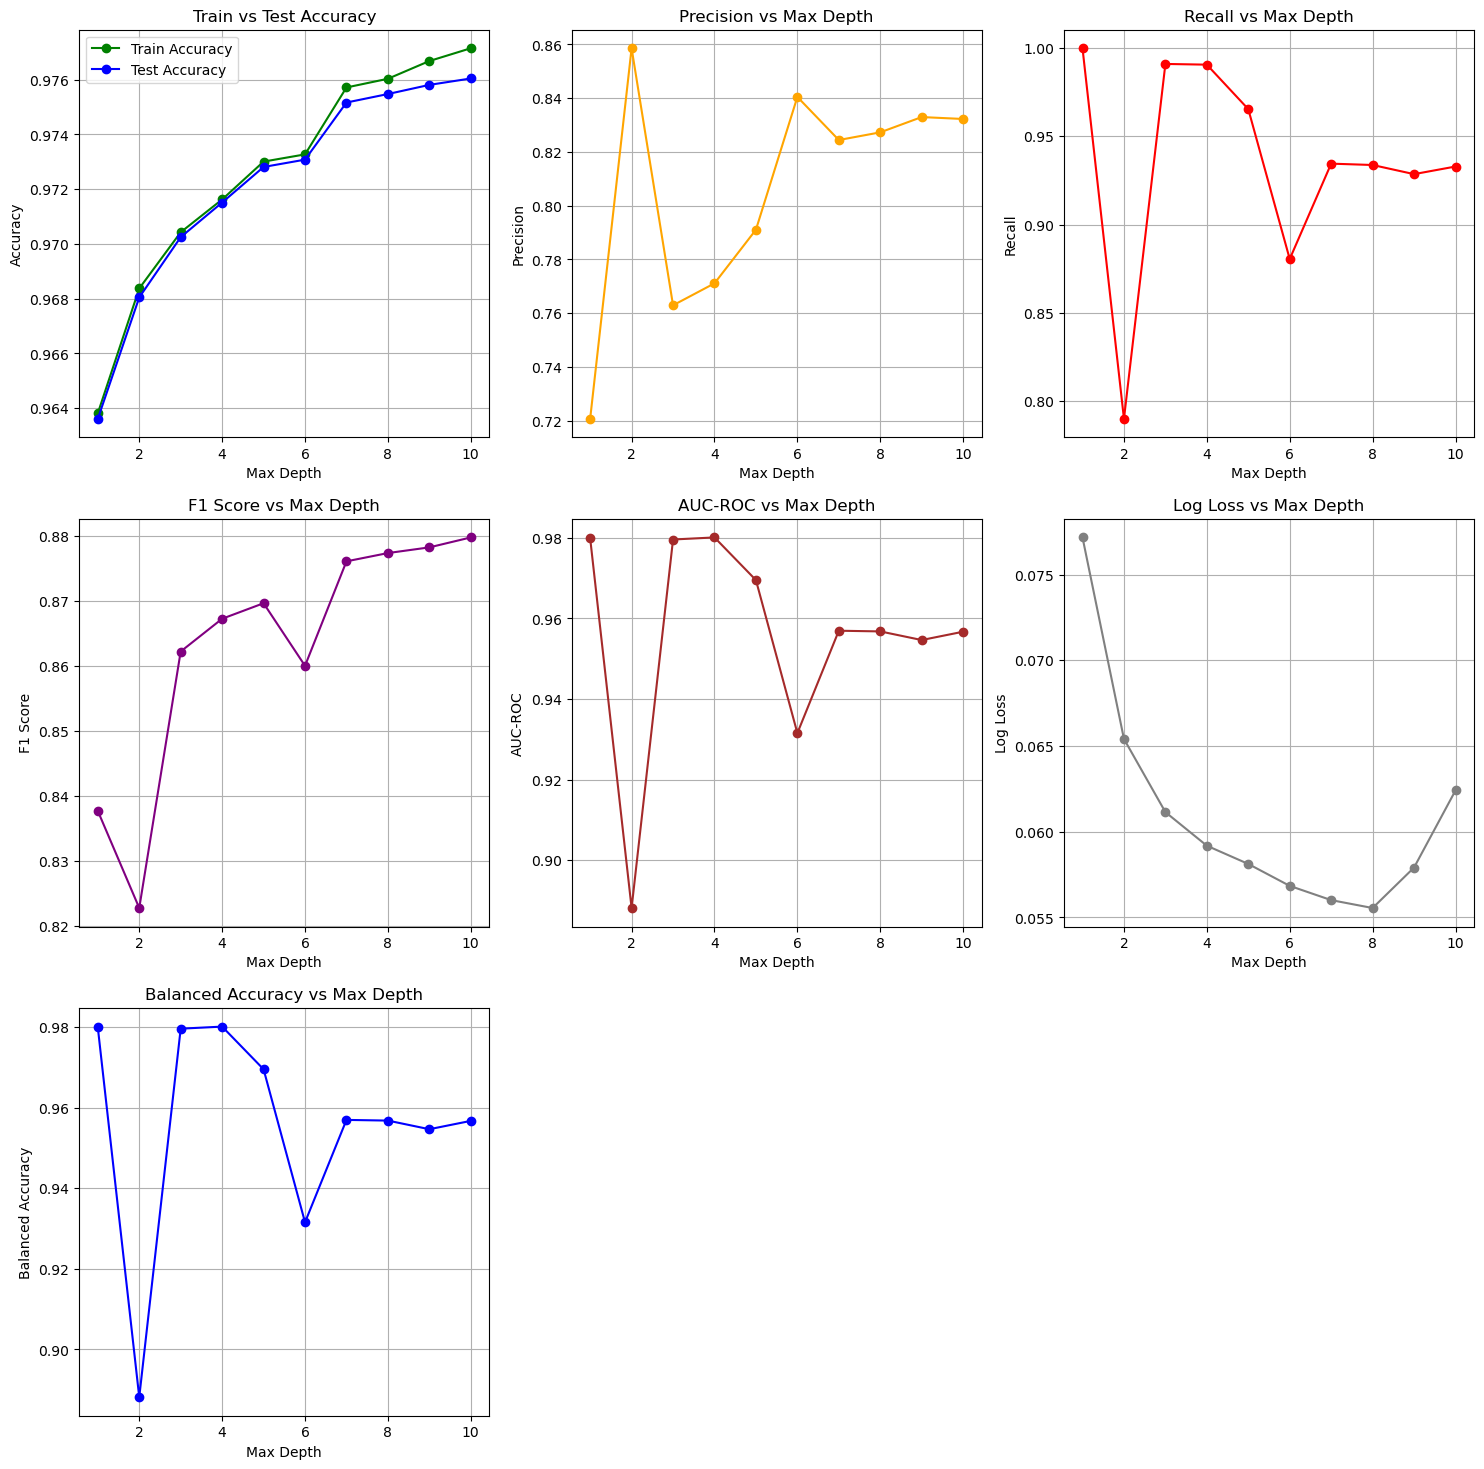

Single Prediction: [0]


In [142]:
# Function to train the model and return predictions
def predictive_model_classification(model, x, y, test_size=0.2, random_state=42):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Make predictions on both training and test sets
    y_pred_test = model.predict(x_test)   # Predictions on the test set
    y_pred_train = model.predict(x_train)  # Predictions on the training set
    
    # Return the trained model, test data, and predictions
    return model, x_test, y_test, y_pred_train, y_train, y_pred_test

# Initialize lists to store the results for various metrics
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_rocs = []
log_losses = []
balanced_accuracies = []

# Range of max depth values to test for the Decision Tree (from 1 to 10)
max_depth_values = range(1, 11)

# Loop over each max depth value to train the model and calculate metrics
for max_depth in max_depth_values:
    # Initialize a DecisionTreeClassifier with the current max depth
    model = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    
    # Train the model and get predictions
    model, x_test, y_test, y_pred_train, y_train, y_pred_test = predictive_model_classification(model, x, y)
    
    # Calculate various metrics for evaluation
    train_acc = accuracy_score(y_train, y_pred_train)  # Accuracy on the training set
    test_acc = accuracy_score(y_test, y_pred_test)      # Accuracy on the test set
    precision = precision_score(y_test, y_pred_test)    # Precision score
    recall = recall_score(y_test, y_pred_test)          # Recall score
    f1 = f1_score(y_test, y_pred_test)                  # F1 score
    auc_roc = roc_auc_score(y_test, y_pred_test)        # AUC-ROC score
    log_loss_val = log_loss(y_test, model.predict_proba(x_test))  # Log loss
    balanced_acc = balanced_accuracy_score(y_test, y_pred_test)   # Balanced accuracy score

    # Append the calculated metric values to their respective lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    auc_rocs.append(auc_roc)
    log_losses.append(log_loss_val)
    balanced_accuracies.append(balanced_acc)

    # Print metrics for current max depth
    print(f'Max Depth: {max_depth}')
    print(f'Train Accuracy: {train_acc:.4f}')
    print(f'Test Accuracy: {test_acc:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'AUC-ROC: {auc_roc:.4f}')
    print(f'Log Loss: {log_loss_val:.4f}')
    print(f'Balanced Accuracy: {balanced_acc:.4f}\n')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    
    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Max Depth = {max_depth}')
    plt.show()

# Plot the metrics against max depth values using subplots
plt.figure(figsize=(18, 18))

# Plot Train vs Test Accuracy
plt.subplot(3, 3, 1)
plt.plot(max_depth_values, train_accuracies, marker='o', linestyle='-', color='green', label='Train Accuracy')
plt.plot(max_depth_values, test_accuracies, marker='o', linestyle='-', color='blue', label='Test Accuracy')
plt.xlabel('Max Depth')  # X-axis label
plt.ylabel('Accuracy')    # Y-axis label
plt.title('Train vs Test Accuracy')  # Title
plt.legend()  # Show legend
plt.grid(True)  # Add grid lines

# Plot Precision vs Max Depth
plt.subplot(3, 3, 2)
plt.plot(max_depth_values, precisions, marker='o', linestyle='-', color='orange', label='Precision')
plt.xlabel('Max Depth')  # X-axis label
plt.ylabel('Precision')  # Y-axis label
plt.title('Precision vs Max Depth')  # Title
plt.grid(True)  # Add grid lines

# Plot Recall vs Max Depth
plt.subplot(3, 3, 3)
plt.plot(max_depth_values, recalls, marker='o', linestyle='-', color='red', label='Recall')
plt.xlabel('Max Depth')  # X-axis label
plt.ylabel('Recall')     # Y-axis label
plt.title('Recall vs Max Depth')  # Title
plt.grid(True)  # Add grid lines

# Plot F1 Score vs Max Depth
plt.subplot(3, 3, 4)
plt.plot(max_depth_values, f1_scores, marker='o', linestyle='-', color='purple', label='F1 Score')
plt.xlabel('Max Depth')  # X-axis label
plt.ylabel('F1 Score')   # Y-axis label
plt.title('F1 Score vs Max Depth')  # Title
plt.grid(True)  # Add grid lines

# Plot AUC-ROC vs Max Depth
plt.subplot(3, 3, 5)
plt.plot(max_depth_values, auc_rocs, marker='o', linestyle='-', color='brown', label='AUC-ROC')
plt.xlabel('Max Depth')  # X-axis label
plt.ylabel('AUC-ROC')    # Y-axis label
plt.title('AUC-ROC vs Max Depth')  # Title
plt.grid(True)  # Add grid lines

# Plot Log Loss vs Max Depth
plt.subplot(3, 3, 6)
plt.plot(max_depth_values, log_losses, marker='o', linestyle='-', color='gray', label='Log Loss')
plt.xlabel('Max Depth')  # X-axis label
plt.ylabel('Log Loss')   # Y-axis label
plt.title('Log Loss vs Max Depth')  # Title
plt.grid(True)  # Add grid lines

# Plot Balanced Accuracy vs Max Depth
plt.subplot(3, 3, 7)
plt.plot(max_depth_values, balanced_accuracies, marker='o', linestyle='-', color='blue', label='Balanced Accuracy')
plt.xlabel('Max Depth')  # X-axis label
plt.ylabel('Balanced Accuracy')  # Y-axis label
plt.title('Balanced Accuracy vs Max Depth')  # Title
plt.grid(True)  # Add grid lines

# Display the plots
plt.show()

# Save only the predicted values
predictions_df = pd.DataFrame({'Predicted_Label': y_pred_test})

# Save the predicted values to a CSV file
predictions_df.to_csv('predicted_values_dtr.csv', index=False)

# Make a single prediction on a new input data point
# The values in the list are features corresponding to the trained model's input
single_prediction = model.predict([[1, 709, 1586.0, -0.6752163239719442, 0.0621205346920355, -0.407939121815475, -0.156074272276953, -0.7749791570104966, 0, 0, 0, 0, 0]])

# Print the prediction for the new data point
print('Single Prediction:', single_prediction)


# GBC

n_estimators: 1
Train Accuracy: 0.9056
Test Accuracy: 0.9061
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.5000
Log Loss: 0.2397
Balanced Accuracy: 0.5000
----------------------------------------
n_estimators: 2
Train Accuracy: 0.9056
Test Accuracy: 0.9061
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.5000
Log Loss: 0.2062
Balanced Accuracy: 0.5000
----------------------------------------
n_estimators: 3
Train Accuracy: 0.9056
Test Accuracy: 0.9061
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.5000
Log Loss: 0.1829
Balanced Accuracy: 0.5000
----------------------------------------
n_estimators: 4
Train Accuracy: 0.9056
Test Accuracy: 0.9061
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.5000
Log Loss: 0.1649
Balanced Accuracy: 0.5000
----------------------------------------
n_estimators: 5
Train Accuracy: 0.9056
Test Accuracy: 0.9061
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.5000
Log Loss: 0.1503
Balanced Acc

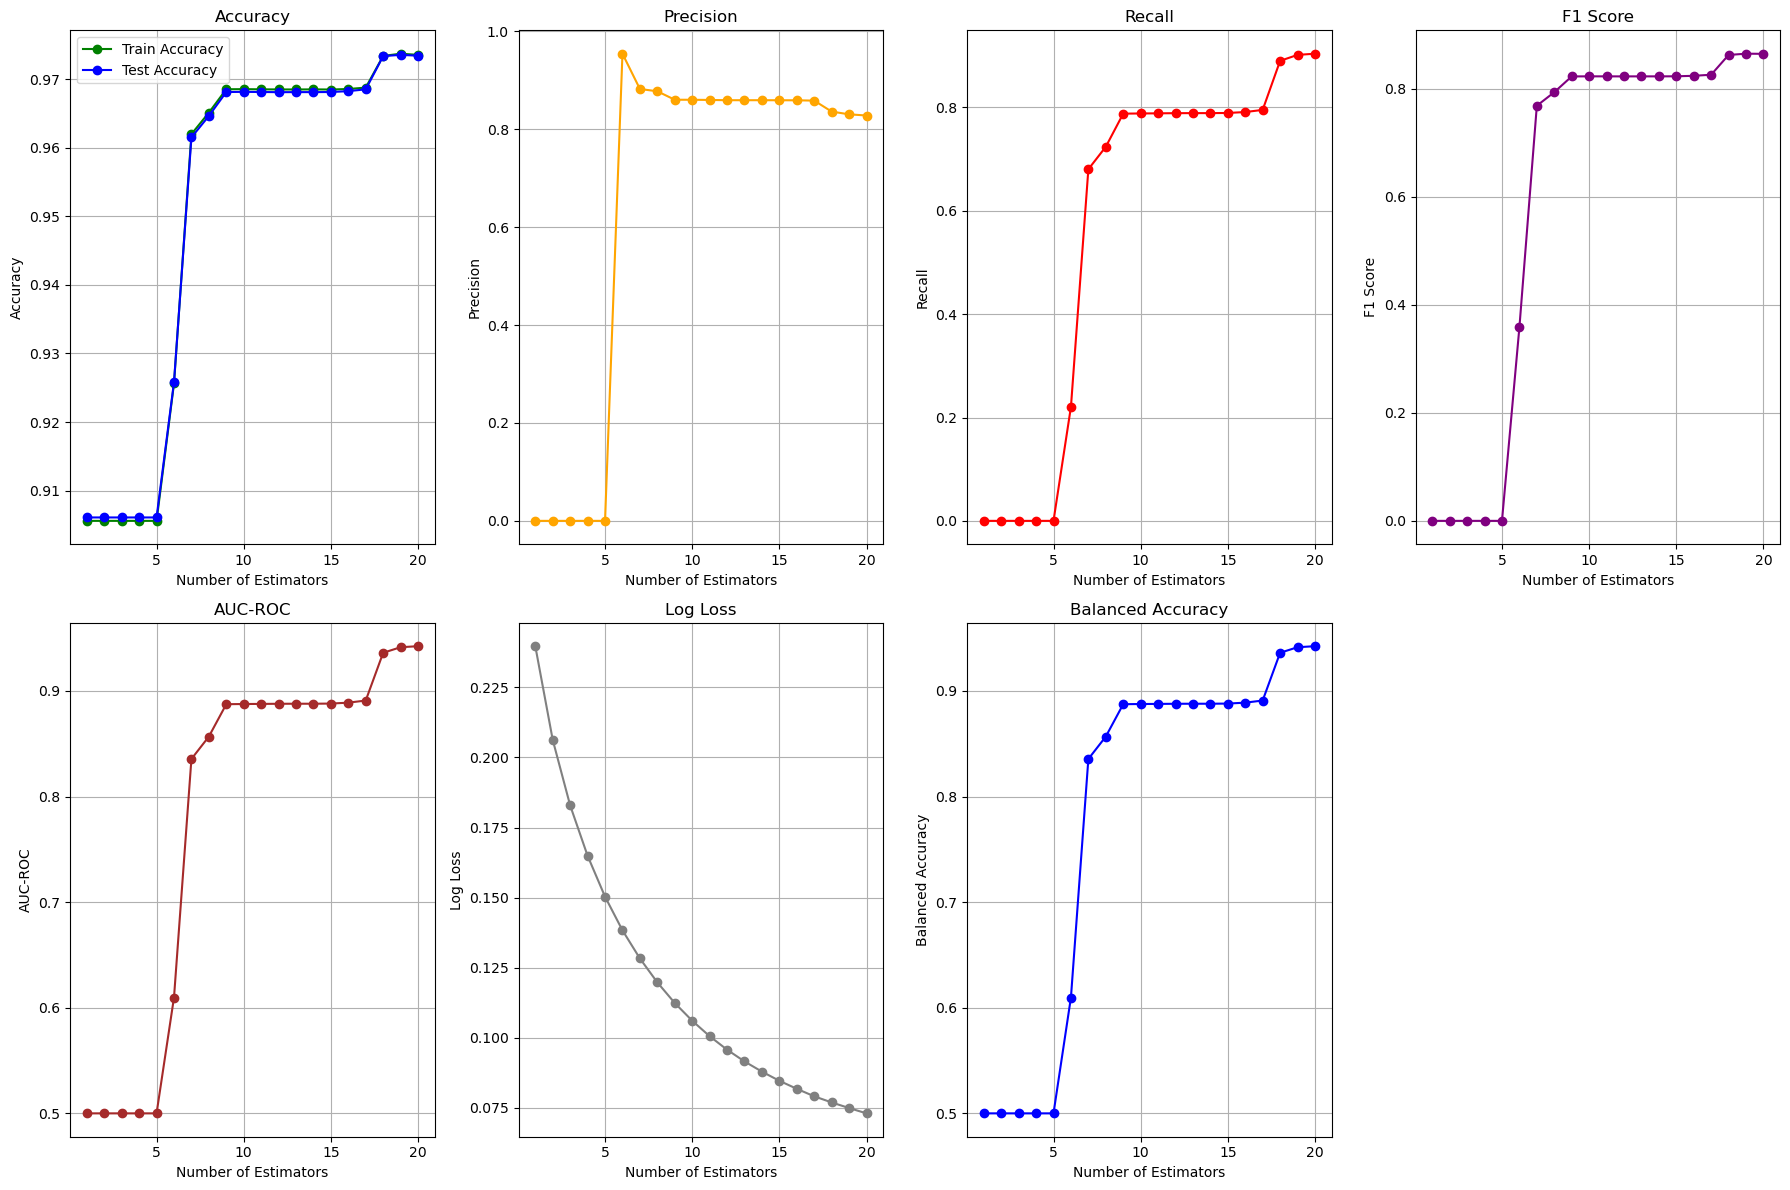

Single Prediction: [0]


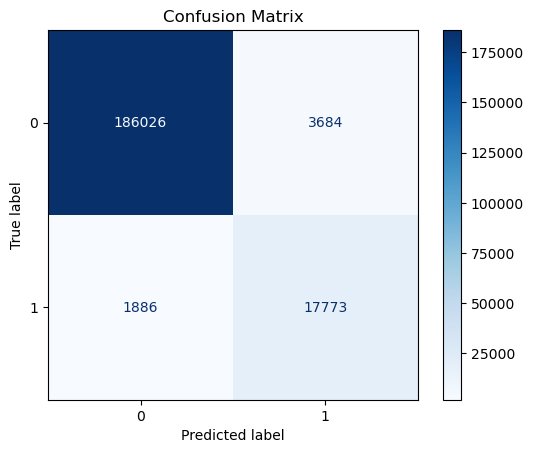

In [144]:
# Function to train the model and return predictions and probabilities for further evaluation
def predictive_model_classification(model, x, y, test_size=0.2, random_state=42):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the test set and the training set
    y_pred_test = model.predict(x_test)   # Test set predictions
    y_pred_train = model.predict(x_train)  # Train set predictions
    
    # Predict probabilities for test data (used for log loss calculation)
    y_prob_test = model.predict_proba(x_test)
    
    # Return model and all relevant predictions and data
    return model, x_train, x_test, y_train, y_test, y_pred_train, y_pred_test, y_prob_test

# Initialize lists to store evaluation metrics across different n_estimators values
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_rocs = []
log_losses = []
balanced_accuracies = []

# Range of n_estimators to test (from 1 to 20)
n_estimators_values = range(1, 21)

# Loop through each value of n_estimators to evaluate its impact on performance
for n_estimators in n_estimators_values:
    # Initialize the GradientBoostingClassifier with the current n_estimators value
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=0.1,  # Set a fixed learning rate to control overfitting
        random_state=42     # Set random state for reproducibility
    )
    
    # Train the model and get predictions, probabilities, and test/train data
    model, x_train, x_test, y_train, y_test, y_pred_train, y_pred_test, y_prob_test = predictive_model_classification(model, x, y)
    
    # Calculate various metrics for evaluation
    train_acc = accuracy_score(y_train, y_pred_train)  # Accuracy on training data
    test_acc = accuracy_score(y_test, y_pred_test)     # Accuracy on testing data
    precision = precision_score(y_test, y_pred_test)   # Precision score
    recall = recall_score(y_test, y_pred_test)         # Recall score
    f1 = f1_score(y_test, y_pred_test)                 # F1 score
    auc_roc = roc_auc_score(y_test, y_pred_test)       # AUC-ROC score
    ll = log_loss(y_test, y_prob_test)                 # Log loss using predicted probabilities
    balanced_acc = balanced_accuracy_score(y_test, y_pred_test)  # Balanced accuracy score
    
    # Append each metric's result to the corresponding list
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    auc_rocs.append(auc_roc)
    log_losses.append(ll)
    balanced_accuracies.append(balanced_acc)

    # Print the metrics for the current n_estimators
    print(f"n_estimators: {n_estimators}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"Log Loss: {ll:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print("-" * 40)  # Separator for readability

# Plot the various metrics as a function of n_estimators
plt.figure(figsize=(18, 12))  # Set the figure size

# Plot Train vs Test Accuracy
plt.subplot(2, 4, 1)
plt.plot(n_estimators_values, train_accuracies, 'o-', color='green', label='Train Accuracy')
plt.plot(n_estimators_values, test_accuracies, 'o-', color='blue', label='Test Accuracy')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Accuracy')              # Y-axis label
plt.title('Accuracy')               # Title
plt.legend()                        # Display legend
plt.grid(True)                      # Add grid

# Plot Precision
plt.subplot(2, 4, 2)
plt.plot(n_estimators_values, precisions, 'o-', color='orange', label='Precision')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Precision')             # Y-axis label
plt.title('Precision')              # Title
plt.grid(True)                      # Add grid

# Plot Recall
plt.subplot(2, 4, 3)
plt.plot(n_estimators_values, recalls, 'o-', color='red', label='Recall')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Recall')                # Y-axis label
plt.title('Recall')                 # Title
plt.grid(True)                      # Add grid

# Plot F1 Score
plt.subplot(2, 4, 4)
plt.plot(n_estimators_values, f1_scores, 'o-', color='purple', label='F1 Score')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('F1 Score')              # Y-axis label
plt.title('F1 Score')               # Title
plt.grid(True)                      # Add grid

# Plot AUC-ROC
plt.subplot(2, 4, 5)
plt.plot(n_estimators_values, auc_rocs, 'o-', color='brown', label='AUC-ROC')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('AUC-ROC')               # Y-axis label
plt.title('AUC-ROC')                # Title
plt.grid(True)                      # Add grid

# Plot Log Loss
plt.subplot(2, 4, 6)
plt.plot(n_estimators_values, log_losses, 'o-', color='gray', label='Log Loss')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Log Loss')              # Y-axis label
plt.title('Log Loss')               # Title
plt.grid(True)                      # Add grid

# Plot Balanced Accuracy
plt.subplot(2, 4, 7)
plt.plot(n_estimators_values, balanced_accuracies, 'o-', color='blue', label='Balanced Accuracy')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Balanced Accuracy')     # Y-axis label
plt.title('Balanced Accuracy')      # Title
plt.grid(True)                      # Add grid

# Adjust layout to avoid overlap
plt.tight_layout()

# Display all the plots
plt.show()

# Save only the predicted values
predictions_df = pd.DataFrame({'Predicted_Label': y_pred_test})

# Save the predicted values to a CSV file
predictions_df.to_csv('predicted_values_gbc.csv', index=False)

# Make a single prediction using the model with the latest configuration
single_prediction = model.predict([[1, 709, 1586.0, -0.6752163239719442, 0.0621205346920355, -0.407939121815475, -0.156074272276953, -0.7749791570104966, 0, 0, 0, 0, 0]])

# Print the result of the single prediction
print("Single Prediction:", single_prediction)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)  # Compute confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)  # Create confusion matrix display
disp.plot(cmap=plt.cm.Blues)  # Plot the confusion matrix with a color map
plt.title('Confusion Matrix')  # Title for the plot
plt.show()  # Display the plot


# XGB

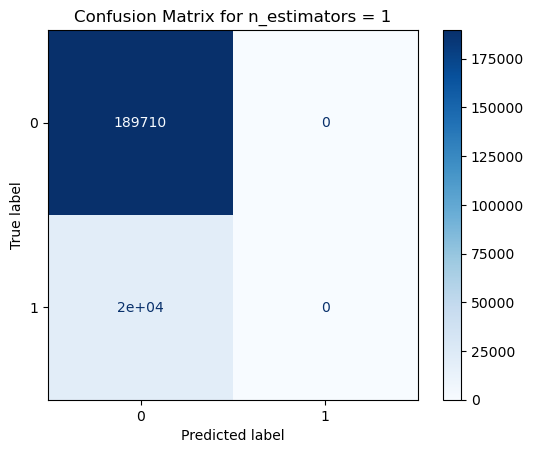

Metrics for n_estimators = 1:
Training Accuracy: 0.9056
Testing Accuracy: 0.9061
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.5000
Log Loss: 0.2852
Balanced Accuracy: 0.5000



Metrics for n_estimators = 2:
Training Accuracy: 0.9056
Testing Accuracy: 0.9061
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.5000
Log Loss: 0.2520
Balanced Accuracy: 0.5000



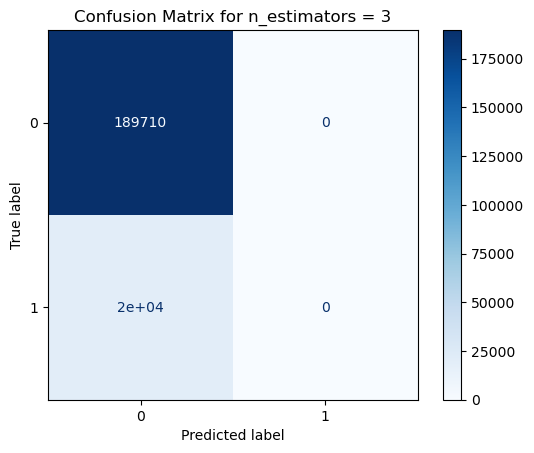

Metrics for n_estimators = 3:
Training Accuracy: 0.9056
Testing Accuracy: 0.9061
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.5000
Log Loss: 0.2253
Balanced Accuracy: 0.5000



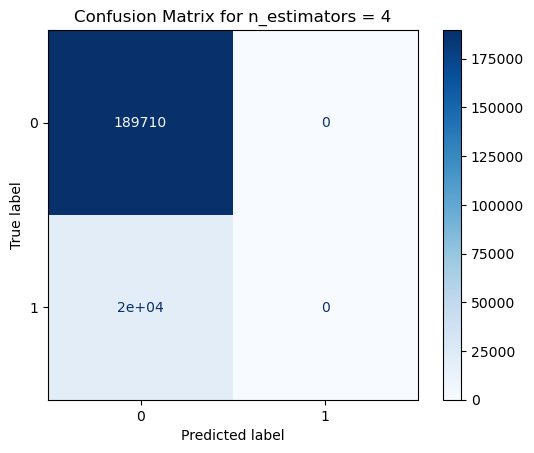

Metrics for n_estimators = 4:
Training Accuracy: 0.9056
Testing Accuracy: 0.9061
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
AUC-ROC: 0.5000
Log Loss: 0.2043
Balanced Accuracy: 0.5000



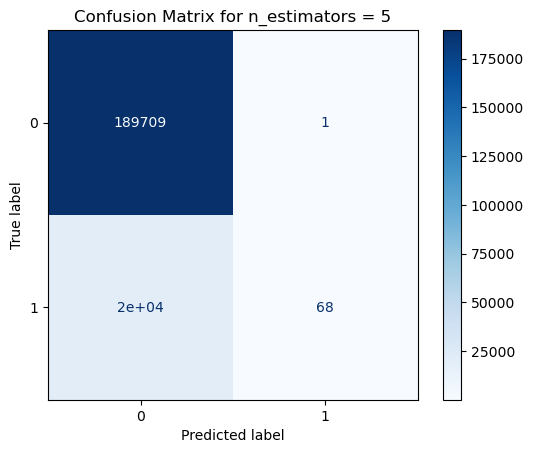

Metrics for n_estimators = 5:
Training Accuracy: 0.9059
Testing Accuracy: 0.9064
Precision: 0.9855
Recall: 0.0035
F1 Score: 0.0069
AUC-ROC: 0.5017
Log Loss: 0.1869
Balanced Accuracy: 0.5017



Metrics for n_estimators = 6:
Training Accuracy: 0.9251
Testing Accuracy: 0.9254
Precision: 0.9593
Recall: 0.2144
F1 Score: 0.3505
AUC-ROC: 0.6067
Log Loss: 0.1772
Balanced Accuracy: 0.6067



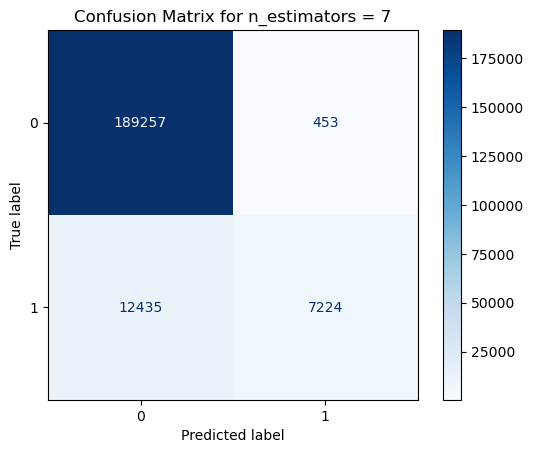

Metrics for n_estimators = 7:
Training Accuracy: 0.9383
Testing Accuracy: 0.9384
Precision: 0.9410
Recall: 0.3675
F1 Score: 0.5285
AUC-ROC: 0.6825
Log Loss: 0.1691
Balanced Accuracy: 0.6825



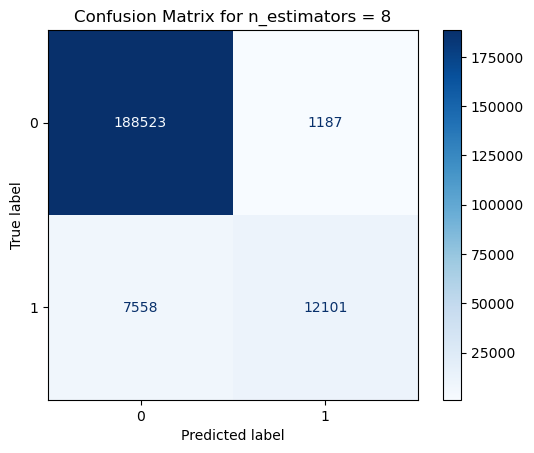

Metrics for n_estimators = 8:
Training Accuracy: 0.9584
Testing Accuracy: 0.9582
Precision: 0.9107
Recall: 0.6155
F1 Score: 0.7346
AUC-ROC: 0.8046
Log Loss: 0.1559
Balanced Accuracy: 0.8046



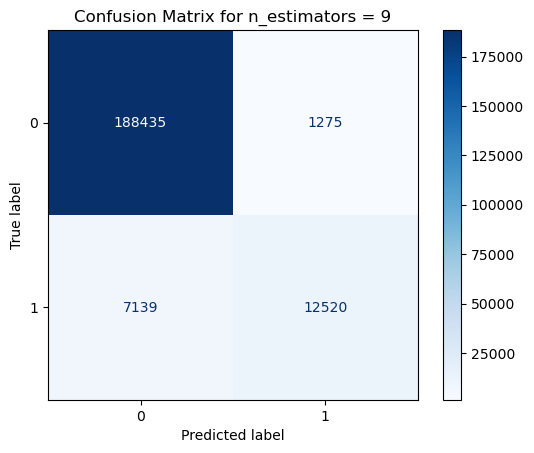

Metrics for n_estimators = 9:
Training Accuracy: 0.9598
Testing Accuracy: 0.9598
Precision: 0.9076
Recall: 0.6369
F1 Score: 0.7485
AUC-ROC: 0.8151
Log Loss: 0.1497
Balanced Accuracy: 0.8151



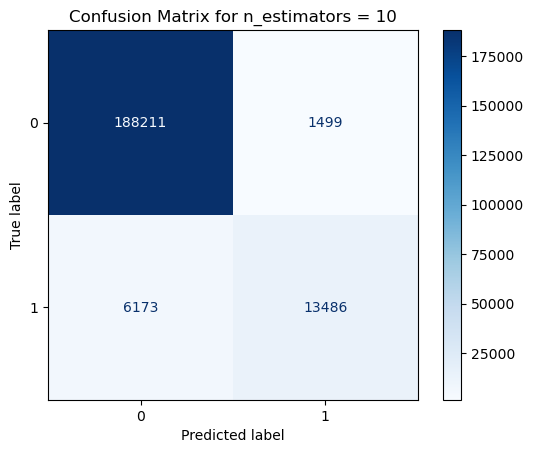

Metrics for n_estimators = 10:
Training Accuracy: 0.9636
Testing Accuracy: 0.9634
Precision: 0.9000
Recall: 0.6860
F1 Score: 0.7785
AUC-ROC: 0.8390
Log Loss: 0.1390
Balanced Accuracy: 0.8390



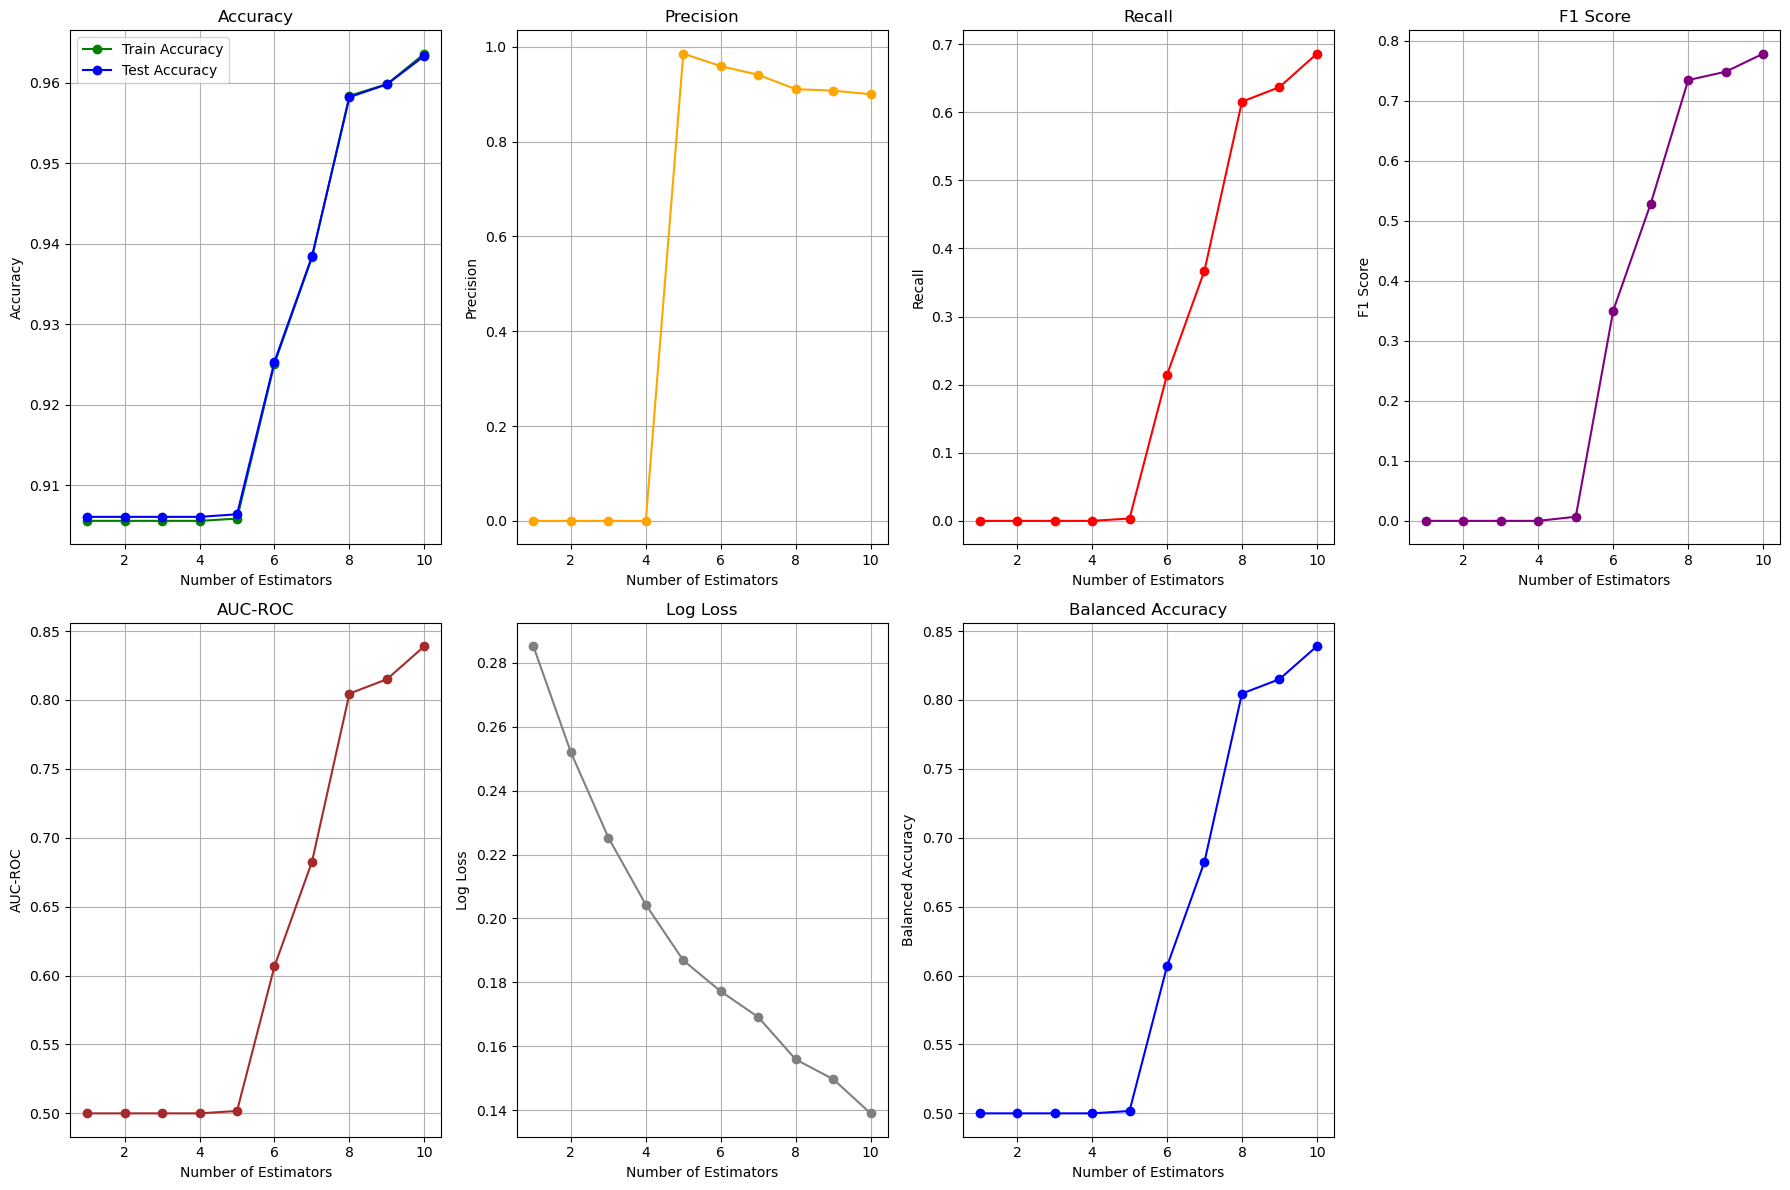

Single Prediction: [0]


In [146]:
# Function to train the model and return predictions and probabilities for evaluation
def predictive_model_classification(model, x, y, test_size=0.2, random_state=42):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the test set and the training set
    y_pred_test = model.predict(x_test)   # Test set predictions
    y_pred_train = model.predict(x_train)  # Train set predictions
    
    # Predict probabilities for the test set (used for log loss calculation)
    y_prob_test = model.predict_proba(x_test)
    
    # Return the model, train/test sets, predictions, and probabilities
    return model, x_train, x_test, y_train, y_test, y_pred_train, y_pred_test, y_prob_test

# Initialize lists to store metrics for each value of n_estimators
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_rocs = []
log_losses = []
balanced_accuracies = []

# Define the range of n_estimators to test (from 1 to 10)
n_estimators_values = range(1, 11)

# Loop through each n_estimators value to train and evaluate the model
for n_estimators in n_estimators_values:
    # Initialize the XGBClassifier with the current n_estimators value
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=3,               # Max depth of the trees
        learning_rate=0.1,         # Control learning rate to avoid overfitting
        subsample=0.8,             # Subsample ratio of the training instances
        colsample_bytree=0.8,      # Subsample ratio of features used for each tree
        reg_lambda=1,              # L2 regularization term
        reg_alpha=0.1,             # L1 regularization term
        use_label_encoder=False,    # Disable label encoding for compatibility with new XGBoost versions
        eval_metric='logloss',     # Metric for evaluation
        random_state=42            # Set random state for reproducibility
    )
    
    # Train the model and get predictions, probabilities, and train/test data
    model, x_train, x_test, y_train, y_test, y_pred_train, y_pred_test, y_prob_test = predictive_model_classification(model, x, y)
    
    # Calculate various metrics for evaluation
    train_acc = accuracy_score(y_train, y_pred_train)  # Training accuracy
    test_acc = accuracy_score(y_test, y_pred_test)     # Testing accuracy
    precision = precision_score(y_test, y_pred_test)   # Precision score
    recall = recall_score(y_test, y_pred_test)         # Recall score
    f1 = f1_score(y_test, y_pred_test)                 # F1 score
    auc_roc = roc_auc_score(y_test, y_pred_test)       # AUC-ROC score
    ll = log_loss(y_test, y_prob_test)                 # Log loss using predicted probabilities
    balanced_acc = balanced_accuracy_score(y_test, y_pred_test)  # Balanced accuracy score
    
    # Append metrics to corresponding lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    auc_rocs.append(auc_roc)
    log_losses.append(ll)
    balanced_accuracies.append(balanced_acc)

    # Create and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for n_estimators = {n_estimators}')
    plt.show()

    # Print metrics for the current n_estimators value
    print(f'Metrics for n_estimators = {n_estimators}:')
    print(f'Training Accuracy: {train_acc:.4f}')
    print(f'Testing Accuracy: {test_acc:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'AUC-ROC: {auc_roc:.4f}')
    print(f'Log Loss: {ll:.4f}')
    print(f'Balanced Accuracy: {balanced_acc:.4f}\n')

# Plotting metrics to visualize the performance of the model across different n_estimators values
plt.figure(figsize=(18, 12))  # Set figure size

# Plot Train vs Test Accuracy
plt.subplot(2, 4, 1)
plt.plot(n_estimators_values, train_accuracies, 'o-', color='green', label='Train Accuracy')
plt.plot(n_estimators_values, test_accuracies, 'o-', color='blue', label='Test Accuracy')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Accuracy')              # Y-axis label
plt.title('Accuracy')               # Title
plt.legend()                        # Show legend
plt.grid(True)                      # Add grid

# Plot Precision
plt.subplot(2, 4, 2)
plt.plot(n_estimators_values, precisions, 'o-', color='orange', label='Precision')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Precision')             # Y-axis label
plt.title('Precision')              # Title
plt.grid(True)                      # Add grid

# Plot Recall
plt.subplot(2, 4, 3)
plt.plot(n_estimators_values, recalls, 'o-', color='red', label='Recall')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Recall')                # Y-axis label
plt.title('Recall')                 # Title
plt.grid(True)                      # Add grid

# Plot F1 Score
plt.subplot(2, 4, 4)
plt.plot(n_estimators_values, f1_scores, 'o-', color='purple', label='F1 Score')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('F1 Score')              # Y-axis label
plt.title('F1 Score')               # Title
plt.grid(True)                      # Add grid

# Plot AUC-ROC
plt.subplot(2, 4, 5)
plt.plot(n_estimators_values, auc_rocs, 'o-', color='brown', label='AUC-ROC')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('AUC-ROC')               # Y-axis label
plt.title('AUC-ROC')                # Title
plt.grid(True)                      # Add grid

# Plot Log Loss
plt.subplot(2, 4, 6)
plt.plot(n_estimators_values, log_losses, 'o-', color='gray', label='Log Loss')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Log Loss')              # Y-axis label
plt.title('Log Loss')               # Title
plt.grid(True)                      # Add grid

# Plot Balanced Accuracy
plt.subplot(2, 4, 7)
plt.plot(n_estimators_values, balanced_accuracies, 'o-', color='blue', label='Balanced Accuracy')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Balanced Accuracy')     # Y-axis label
plt.title('Balanced Accuracy')      # Title
plt.grid(True)                      # Add grid

# Optimize layout to prevent overlapping
plt.tight_layout()

# Show all the plots
plt.show()

# Save only the predicted values
predictions_df = pd.DataFrame({'Predicted_Label': y_pred_test})

# Save the predicted values to a CSV file
predictions_df.to_csv('predicted_values_xgb.csv', index=False)

# Make a single prediction using the model with the latest configuration
single_prediction = model.predict([[1, 709, 1586.0, -0.6752163239719442, 0.0621205346920355, -0.407939121815475, -0.156074272276953, -0.7749791570104966, 0, 0, 0, 0, 0]])

# Print the result of the single prediction
print('Single Prediction:', single_prediction)


# STACKING

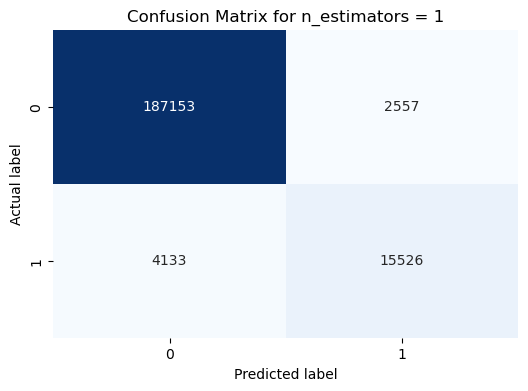

Metrics for n_estimators = 1:
Training Accuracy: 0.9684
Testing Accuracy: 0.9680
Precision: 0.8586
Recall: 0.7898
F1 Score: 0.8227
AUC-ROC: 0.8881
Log Loss: 0.0697
Balanced Accuracy: 0.8881



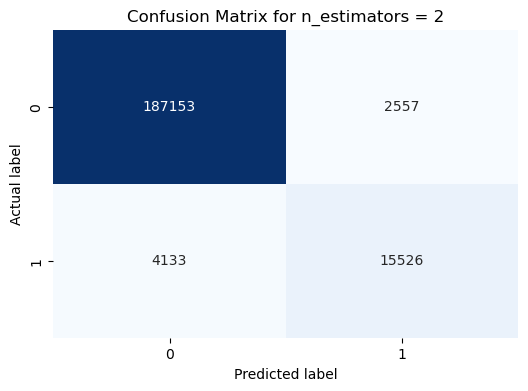

Metrics for n_estimators = 2:
Training Accuracy: 0.9684
Testing Accuracy: 0.9680
Precision: 0.8586
Recall: 0.7898
F1 Score: 0.8227
AUC-ROC: 0.8881
Log Loss: 0.0698
Balanced Accuracy: 0.8881



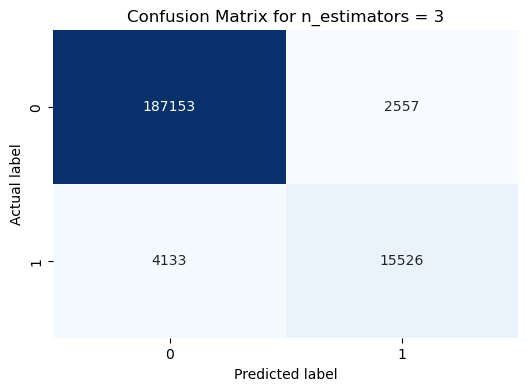

Metrics for n_estimators = 3:
Training Accuracy: 0.9684
Testing Accuracy: 0.9680
Precision: 0.8586
Recall: 0.7898
F1 Score: 0.8227
AUC-ROC: 0.8881
Log Loss: 0.0698
Balanced Accuracy: 0.8881



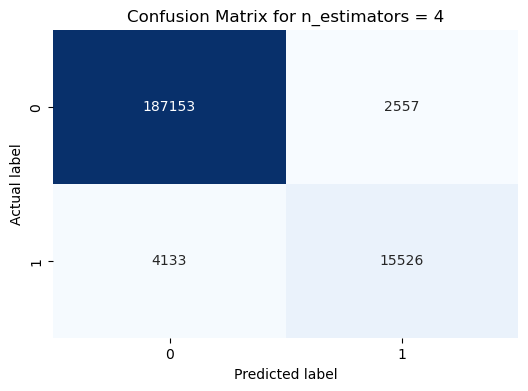

Metrics for n_estimators = 4:
Training Accuracy: 0.9684
Testing Accuracy: 0.9680
Precision: 0.8586
Recall: 0.7898
F1 Score: 0.8227
AUC-ROC: 0.8881
Log Loss: 0.0697
Balanced Accuracy: 0.8881



Metrics for n_estimators = 5:
Training Accuracy: 0.9684
Testing Accuracy: 0.9680
Precision: 0.8586
Recall: 0.7898
F1 Score: 0.8227
AUC-ROC: 0.8881
Log Loss: 0.0696
Balanced Accuracy: 0.8881



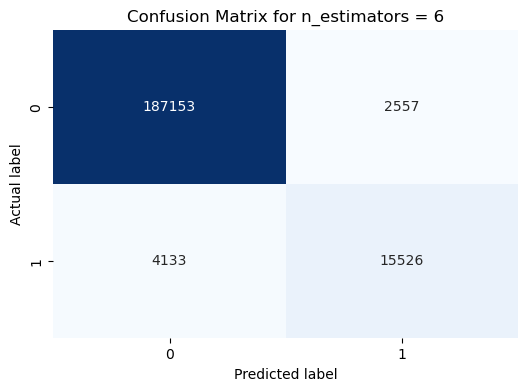

Metrics for n_estimators = 6:
Training Accuracy: 0.9684
Testing Accuracy: 0.9680
Precision: 0.8586
Recall: 0.7898
F1 Score: 0.8227
AUC-ROC: 0.8881
Log Loss: 0.0694
Balanced Accuracy: 0.8881



Metrics for n_estimators = 7:
Training Accuracy: 0.9684
Testing Accuracy: 0.9680
Precision: 0.8586
Recall: 0.7898
F1 Score: 0.8227
AUC-ROC: 0.8881
Log Loss: 0.0693
Balanced Accuracy: 0.8881



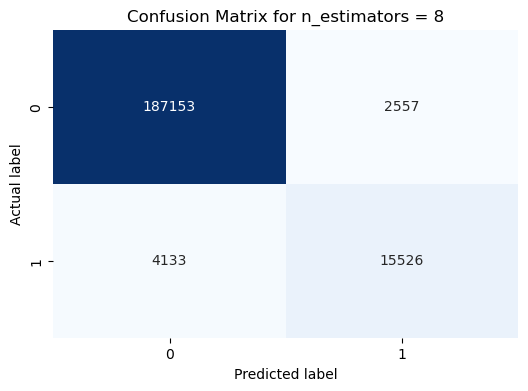

Metrics for n_estimators = 8:
Training Accuracy: 0.9684
Testing Accuracy: 0.9680
Precision: 0.8586
Recall: 0.7898
F1 Score: 0.8227
AUC-ROC: 0.8881
Log Loss: 0.0691
Balanced Accuracy: 0.8881



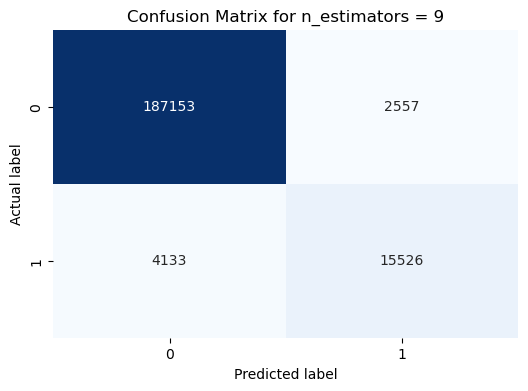

Metrics for n_estimators = 9:
Training Accuracy: 0.9684
Testing Accuracy: 0.9680
Precision: 0.8586
Recall: 0.7898
F1 Score: 0.8227
AUC-ROC: 0.8881
Log Loss: 0.0682
Balanced Accuracy: 0.8881



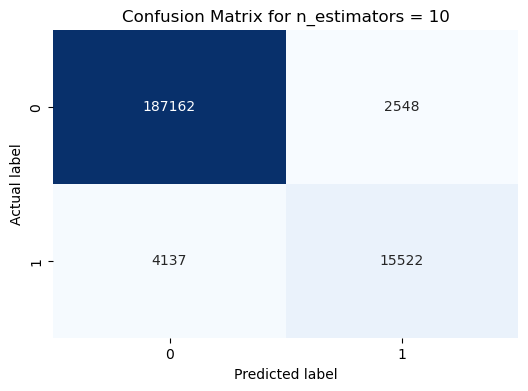

Metrics for n_estimators = 10:
Training Accuracy: 0.9684
Testing Accuracy: 0.9681
Precision: 0.8590
Recall: 0.7896
F1 Score: 0.8228
AUC-ROC: 0.8881
Log Loss: 0.0680
Balanced Accuracy: 0.8881



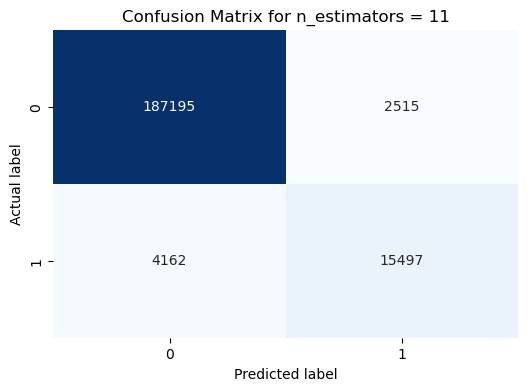

Metrics for n_estimators = 11:
Training Accuracy: 0.9685
Testing Accuracy: 0.9681
Precision: 0.8604
Recall: 0.7883
F1 Score: 0.8228
AUC-ROC: 0.8875
Log Loss: 0.0673
Balanced Accuracy: 0.8875



Metrics for n_estimators = 12:
Training Accuracy: 0.9685
Testing Accuracy: 0.9681
Precision: 0.8595
Recall: 0.7892
F1 Score: 0.8228
AUC-ROC: 0.8879
Log Loss: 0.0673
Balanced Accuracy: 0.8879



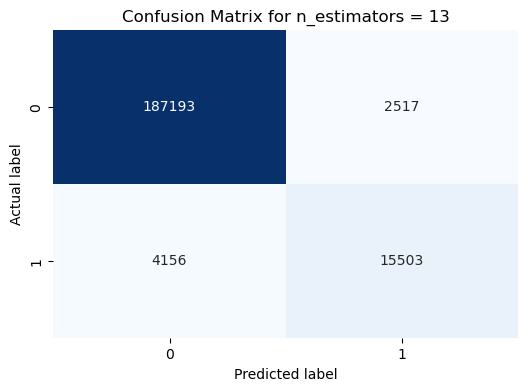

Metrics for n_estimators = 13:
Training Accuracy: 0.9685
Testing Accuracy: 0.9681
Precision: 0.8603
Recall: 0.7886
F1 Score: 0.8229
AUC-ROC: 0.8877
Log Loss: 0.0671
Balanced Accuracy: 0.8877



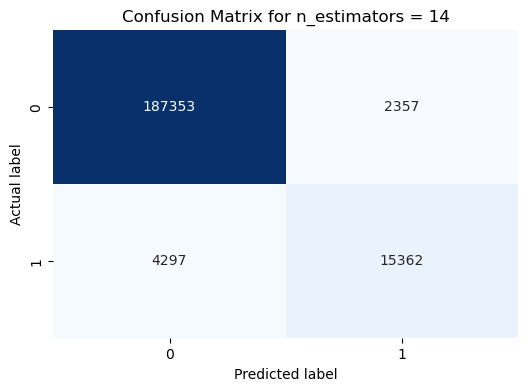

Metrics for n_estimators = 14:
Training Accuracy: 0.9687
Testing Accuracy: 0.9682
Precision: 0.8670
Recall: 0.7814
F1 Score: 0.8220
AUC-ROC: 0.8845
Log Loss: 0.0661
Balanced Accuracy: 0.8845



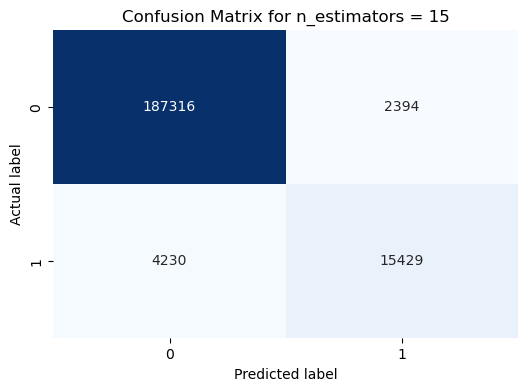

Metrics for n_estimators = 15:
Training Accuracy: 0.9689
Testing Accuracy: 0.9684
Precision: 0.8657
Recall: 0.7848
F1 Score: 0.8233
AUC-ROC: 0.8861
Log Loss: 0.0661
Balanced Accuracy: 0.8861



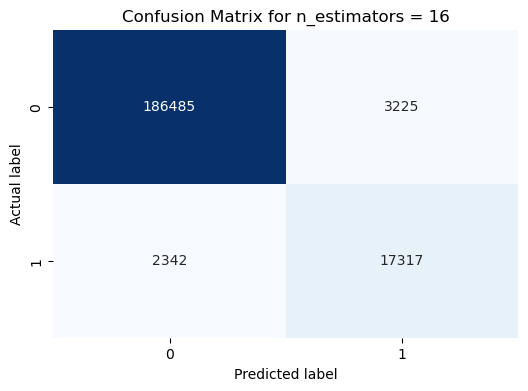

Metrics for n_estimators = 16:
Training Accuracy: 0.9736
Testing Accuracy: 0.9734
Precision: 0.8430
Recall: 0.8809
F1 Score: 0.8615
AUC-ROC: 0.9319
Log Loss: 0.0650
Balanced Accuracy: 0.9319



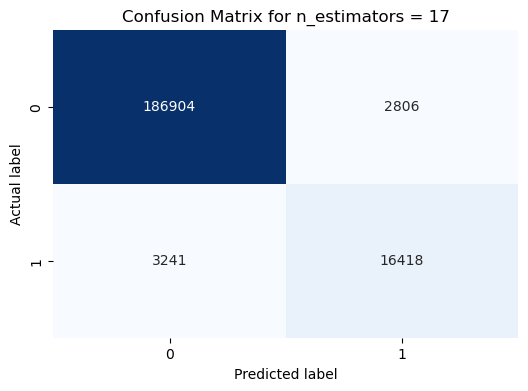

Metrics for n_estimators = 17:
Training Accuracy: 0.9714
Testing Accuracy: 0.9711
Precision: 0.8540
Recall: 0.8351
F1 Score: 0.8445
AUC-ROC: 0.9102
Log Loss: 0.0653
Balanced Accuracy: 0.9102



Metrics for n_estimators = 18:
Training Accuracy: 0.9714
Testing Accuracy: 0.9710
Precision: 0.8595
Recall: 0.8263
F1 Score: 0.8426
AUC-ROC: 0.9061
Log Loss: 0.0641
Balanced Accuracy: 0.9061



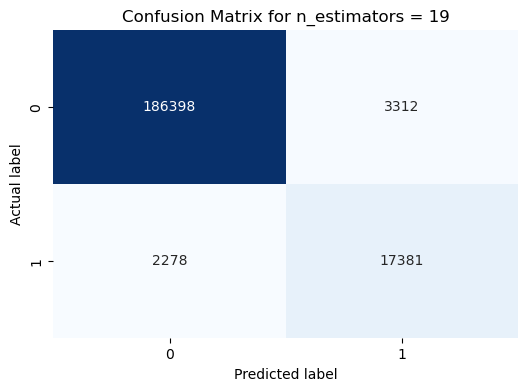

Metrics for n_estimators = 19:
Training Accuracy: 0.9738
Testing Accuracy: 0.9733
Precision: 0.8399
Recall: 0.8841
F1 Score: 0.8615
AUC-ROC: 0.9333
Log Loss: 0.0647
Balanced Accuracy: 0.9333



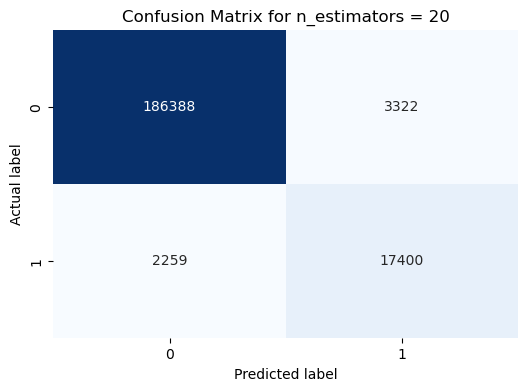

Metrics for n_estimators = 20:
Training Accuracy: 0.9738
Testing Accuracy: 0.9733
Precision: 0.8397
Recall: 0.8851
F1 Score: 0.8618
AUC-ROC: 0.9338
Log Loss: 0.0640
Balanced Accuracy: 0.9338



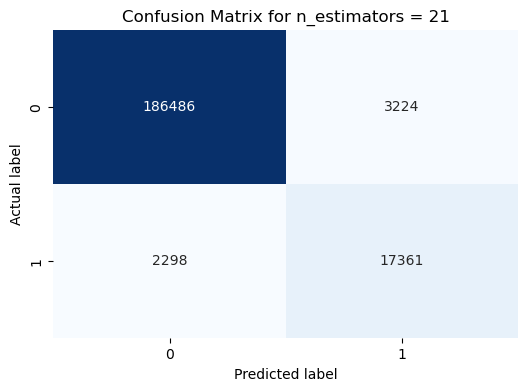

Metrics for n_estimators = 21:
Training Accuracy: 0.9739
Testing Accuracy: 0.9736
Precision: 0.8434
Recall: 0.8831
F1 Score: 0.8628
AUC-ROC: 0.9331
Log Loss: 0.0635
Balanced Accuracy: 0.9331



Metrics for n_estimators = 22:
Training Accuracy: 0.9739
Testing Accuracy: 0.9735
Precision: 0.8442
Recall: 0.8808
F1 Score: 0.8621
AUC-ROC: 0.9320
Log Loss: 0.0640
Balanced Accuracy: 0.9320



Metrics for n_estimators = 23:
Training Accuracy: 0.9739
Testing Accuracy: 0.9735
Precision: 0.8416
Recall: 0.8847
F1 Score: 0.8626
AUC-ROC: 0.9337
Log Loss: 0.0631
Balanced Accuracy: 0.9337



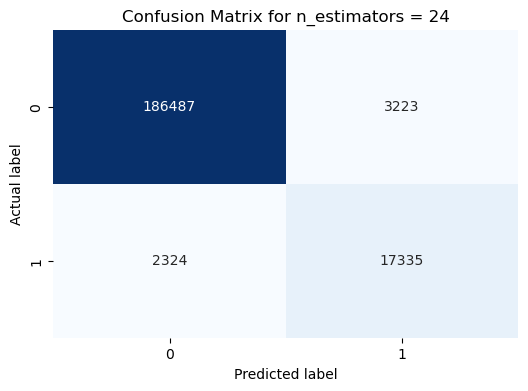

Metrics for n_estimators = 24:
Training Accuracy: 0.9738
Testing Accuracy: 0.9735
Precision: 0.8432
Recall: 0.8818
F1 Score: 0.8621
AUC-ROC: 0.9324
Log Loss: 0.0625
Balanced Accuracy: 0.9324



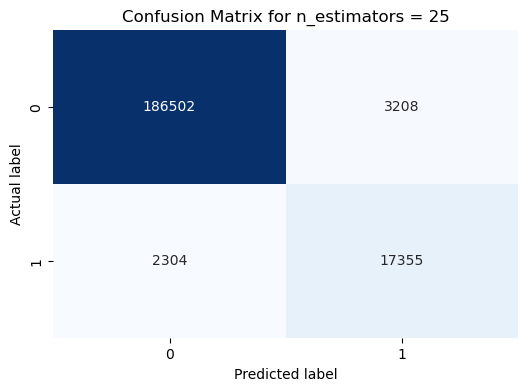

Metrics for n_estimators = 25:
Training Accuracy: 0.9739
Testing Accuracy: 0.9737
Precision: 0.8440
Recall: 0.8828
F1 Score: 0.8630
AUC-ROC: 0.9329
Log Loss: 0.0624
Balanced Accuracy: 0.9329



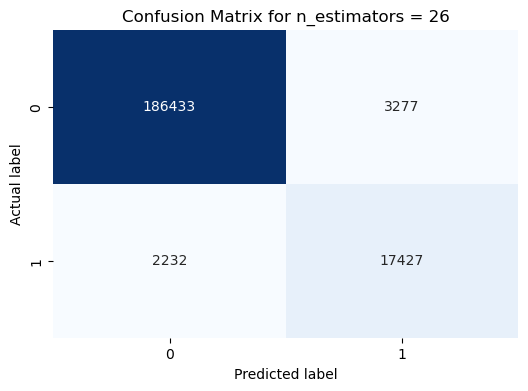

Metrics for n_estimators = 26:
Training Accuracy: 0.9740
Testing Accuracy: 0.9737
Precision: 0.8417
Recall: 0.8865
F1 Score: 0.8635
AUC-ROC: 0.9346
Log Loss: 0.0627
Balanced Accuracy: 0.9346



Metrics for n_estimators = 27:
Training Accuracy: 0.9740
Testing Accuracy: 0.9737
Precision: 0.8422
Recall: 0.8863
F1 Score: 0.8637
AUC-ROC: 0.9345
Log Loss: 0.0626
Balanced Accuracy: 0.9345



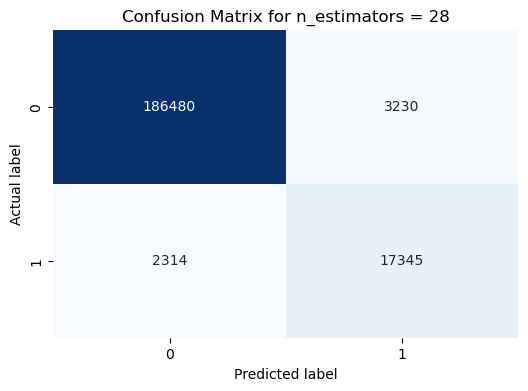

Metrics for n_estimators = 28:
Training Accuracy: 0.9740
Testing Accuracy: 0.9735
Precision: 0.8430
Recall: 0.8823
F1 Score: 0.8622
AUC-ROC: 0.9326
Log Loss: 0.0623
Balanced Accuracy: 0.9326



Metrics for n_estimators = 29:
Training Accuracy: 0.9740
Testing Accuracy: 0.9736
Precision: 0.8450
Recall: 0.8808
F1 Score: 0.8625
AUC-ROC: 0.9320
Log Loss: 0.0621
Balanced Accuracy: 0.9320



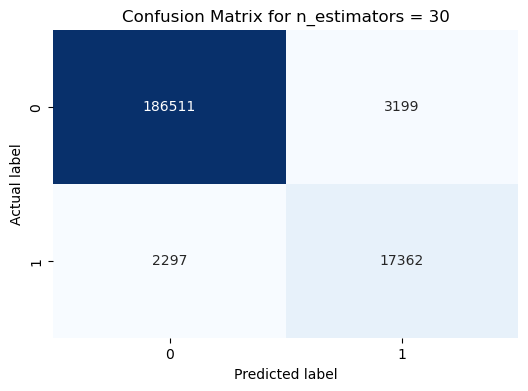

Metrics for n_estimators = 30:
Training Accuracy: 0.9739
Testing Accuracy: 0.9737
Precision: 0.8444
Recall: 0.8832
F1 Score: 0.8634
AUC-ROC: 0.9331
Log Loss: 0.0620
Balanced Accuracy: 0.9331



Single Prediction: [0]


In [148]:
# Function to train the model and return predictions and probabilities for evaluation
def predictive_model_classification(model, x, y, test_size=0.2, random_state=42):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the test set and the training set
    y_pred_test = model.predict(x_test)   # Test set predictions
    y_pred_train = model.predict(x_train)  # Train set predictions
    
    # Predict probabilities for the test set (used for log loss calculation)
    y_prob_test = model.predict_proba(x_test)
    
    # Return the model, train/test sets, predictions, and probabilities
    return model, x_train, x_test, y_train, y_test, y_pred_train, y_pred_test, y_prob_test

# Initialize lists to store metrics for each value of n_estimators
train_accuracies = []
test_accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_rocs = []
log_losses = []
balanced_accuracies = []

# Define the range of n_estimators to test (from 1 to 30)
n_estimators_values = range(1, 31)

# Loop through each n_estimators value to train and evaluate the model
for n_estimators in n_estimators_values:
    # Initialize the base models for stacking
    base_models = [
        ('decision_tree', DecisionTreeClassifier(max_depth=3)),
        ('gradient_boosting', GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.1, subsample=0.8)),
    ]

    # Define the meta-model for stacking (Logistic Regression in this case)
    meta_model = LogisticRegression()

    # Create the stacking model
    stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

    # Train the model and get predictions, probabilities, and train/test data
    model, x_train, x_test, y_train, y_test, y_pred_train, y_pred_test, y_prob_test = predictive_model_classification(stacking_model, x, y)
    
    # Calculate various metrics for evaluation
    train_acc = accuracy_score(y_train, y_pred_train)  # Training accuracy
    test_acc = accuracy_score(y_test, y_pred_test)     # Testing accuracy
    precision = precision_score(y_test, y_pred_test)   # Precision score
    recall = recall_score(y_test, y_pred_test)         # Recall score
    f1 = f1_score(y_test, y_pred_test)                 # F1 score
    auc_roc = roc_auc_score(y_test, y_pred_test)       # AUC-ROC score
    ll = log_loss(y_test, y_prob_test)                 # Log loss using predicted probabilities
    balanced_acc = balanced_accuracy_score(y_test, y_pred_test)  # Balanced accuracy score
    
    # Append metrics to corresponding lists
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    auc_rocs.append(auc_roc)
    log_losses.append(ll)
    balanced_accuracies.append(balanced_acc)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    
    # Plot confusion matrix for this n_estimators value
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for n_estimators = {n_estimators}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    # Print metrics for the current n_estimators value
    print(f'Metrics for n_estimators = {n_estimators}:')
    print(f'Training Accuracy: {train_acc:.4f}')
    print(f'Testing Accuracy: {test_acc:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'AUC-ROC: {auc_roc:.4f}')
    print(f'Log Loss: {ll:.4f}')
    print(f'Balanced Accuracy: {balanced_acc:.4f}\n')

# Plotting metrics to visualize the performance of the model across different n_estimators values
plt.figure(figsize=(18, 12))  # Set figure size

# Plot Train vs Test Accuracy
plt.subplot(2, 4, 1)
plt.plot(n_estimators_values, train_accuracies, 'o-', color='green', label='Train Accuracy')
plt.plot(n_estimators_values, test_accuracies, 'o-', color='blue', label='Test Accuracy')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Accuracy')              # Y-axis label
plt.title('Accuracy')               # Title
plt.legend()                        # Show legend
plt.grid(True)                      # Add grid

# Plot Precision
plt.subplot(2, 4, 2)
plt.plot(n_estimators_values, precisions, 'o-', color='orange', label='Precision')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Precision')             # Y-axis label
plt.title('Precision')              # Title
plt.grid(True)                      # Add grid

# Plot Recall
plt.subplot(2, 4, 3)
plt.plot(n_estimators_values, recalls, 'o-', color='red', label='Recall')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Recall')                # Y-axis label
plt.title('Recall')                 # Title
plt.grid(True)                      # Add grid

# Plot F1 Score
plt.subplot(2, 4, 4)
plt.plot(n_estimators_values, f1_scores, 'o-', color='purple', label='F1 Score')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('F1 Score')              # Y-axis label
plt.title('F1 Score')               # Title
plt.grid(True)                      # Add grid

# Plot AUC-ROC
plt.subplot(2, 4, 5)
plt.plot(n_estimators_values, auc_rocs, 'o-', color='brown', label='AUC-ROC')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('AUC-ROC')               # Y-axis label
plt.title('AUC-ROC')                # Title
plt.grid(True)                      # Add grid

# Plot Log Loss
plt.subplot(2, 4, 6)
plt.plot(n_estimators_values, log_losses, 'o-', color='gray', label='Log Loss')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Log Loss')              # Y-axis label
plt.title('Log Loss')               # Title
plt.grid(True)                      # Add grid

# Plot Balanced Accuracy
plt.subplot(2, 4, 7)
plt.plot(n_estimators_values, balanced_accuracies, 'o-', color='blue', label='Balanced Accuracy')
plt.xlabel('Number of Estimators')  # X-axis label
plt.ylabel('Balanced Accuracy')     # Y-axis label
plt.title('Balanced Accuracy')      # Title
plt.grid(True)                      # Add grid

# Optimize layout to prevent overlapping
plt.tight_layout()

# Show all the plots
plt.show()

# Save only the predicted values
predictions_df = pd.DataFrame({'Predicted_Label': y_pred_test})

# Save the predicted values to a CSV file
predictions_df.to_csv('predicted_values_stack.csv', index=False)

# Make a single prediction using the model with the latest configuration
single_prediction = model.predict([[1, 709, 1586.0, -0.6752163239719442, 0.0621205346920355, -0.407939121815475, -0.156074272276953, -0.7749791570104966, 0, 0, 0, 0, 0]])

# Print the result of the single prediction
print('Single Prediction:', single_prediction)
